#  Exploratory data analysis - Kiva.org
***

#  Details of the company's activities
***
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Kiva.org_logo_2016.svg/640px-Kiva.org_logo_2016.svg.png" width="500" height="200" />

**Make a loan, change a life**.
Kiva is an international nonprofit with a mission to expand financial access to help underserved communities thrive. Kiva crowdfunds loans for borrowers in more than 80 countries who are often financially excluded and can't access other fair and affordable sources of credit for different kind of needs and business projects.<br>
<br>
Most of the Kiva's work related to support for the population, development of small business and also funding of social projects.
Information about list of applications, request purposes and countries are available on the web-site kiva.org. One way or another that relates to agriculture, food sector, health and hygiene, retail trade support for small businesses.<br>

##  Objectives of the exploratory data analysis
***

Kiva wants tthe loans to be spent with maximum utility. Primarily, the company is interested not by the variance of credits but meaningful conclusions and recommendations, to enable it to work effectively and better understand individual countries' specific needs and the poverty rate of different countries and regions.

- Verifying "purity" of the source data, outliers, missing and invalid values.
- Identification of initial interdependencies in data.
- Identification of the major demographic characteristics of users (macro-regions and countries, gender characteristic of borrowers).
- Identification of an average purposes of money request and amount for money required. Revealing information about the processing of loan requests depending on sectors of the economy and types of activity.
- Identification of the length of waiting time of full financing of loan request (it's known that some users ask a loan to respond to the acute needs).
- Identification of the factors influencing amount of credit and time, required for repayment of the loans.


## Sourse datasets (description)
***

**kiva_loans** — dataset that contains most of informations about loans:<br>
<br>
- id — unique identifier of loan.
- funded_amount — the amount contributed by kiva.org to field agents (USD).
- loan_amount — dollar values of how much was loaned by kiva.org (USD).
- Parameters of what the loan will be used for:
    * sector
    * activity
    * use
- country_code — ISO-code of a country from which a loan was given.
- country — full name of a country from which a loan was given.
- posted_time — time, at which a request was published on kiva.org.
- disbursed_time — time when a field agent disbursed money to a borrower.
- funded_time — time when a request was entirely funded by creditors.
- term_in_months — the length of time (in months) for which a loan was required.
- lender_count — total number of creditors, that contributed to thу loan.
- loaner_genders — gender of creditors.

**kiva_mpi_region_locations** — Dataset regarding regions with MPI indicators: Global Multidimensional Poverty Index of a number of regions (subnational) in the world. The larger the number is, the higher the poverty level is in the relevant region.

- country
- region
- world_region
- MPI
- geo — geographic coordinates (latitude, longitude).

# Exploratory data analysis
***

In [1192]:
import numpy as np
import pandas as pd
import math
import missingno as msno
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set2')

import os

In [1193]:
df_kiva_loans = pd.read_csv("./kiva_loans.csv")
df_mpi = pd.read_csv("./kiva_mpi_region_locations.csv")

<br>**Displaying the first lines of dataset:**

In [1285]:
df_kiva_loans.head(5)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,ISO,world_region,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2014-01-02 09:17:23+00:00,11.0,14,NaN,group,irregular,2014-01-01,PAK,South Asia,0.233167
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,IND,South Asia,0.000000
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,PAK,South Asia,0.233167
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01,PAK,South Asia,0.233167


<br>**Check for missing values**.

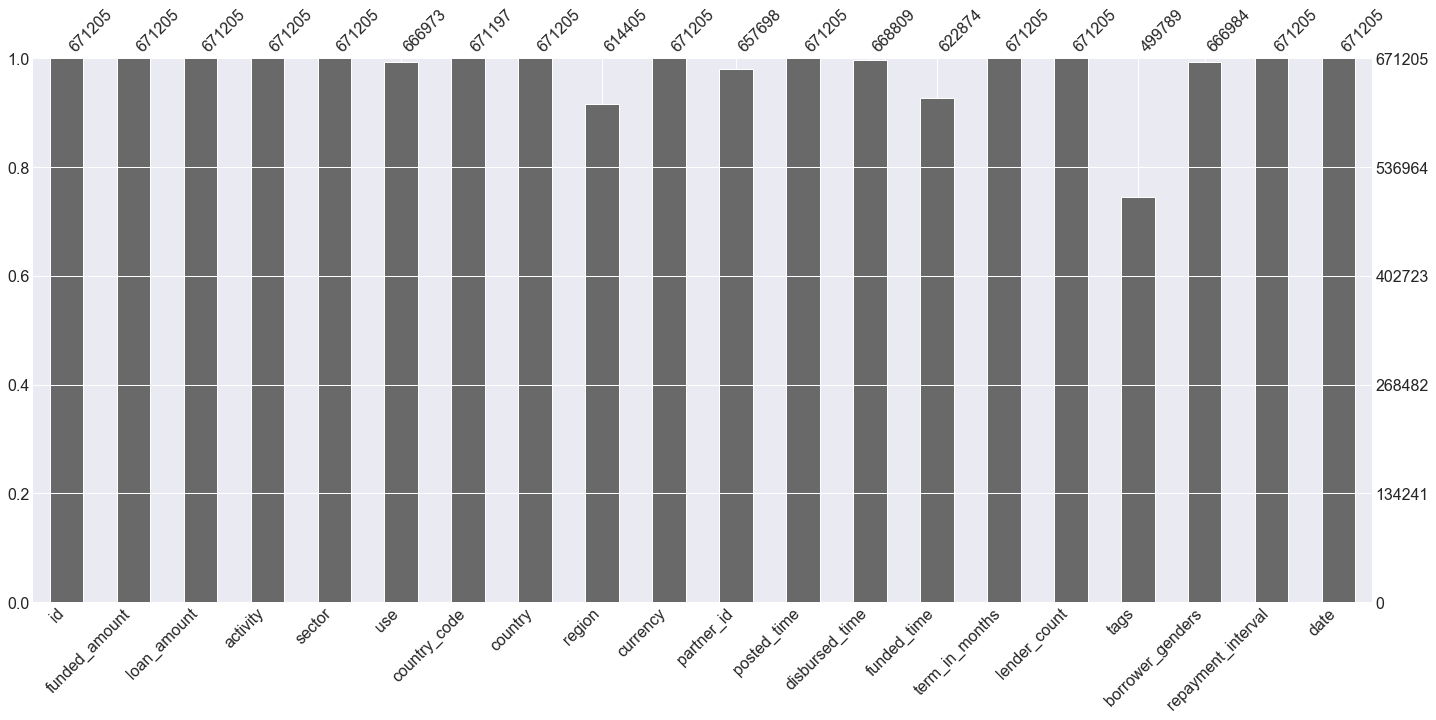

In [1195]:
msno.bar(df_kiva_loans) #процентное содержание пропущенных значений по каждой из колонок

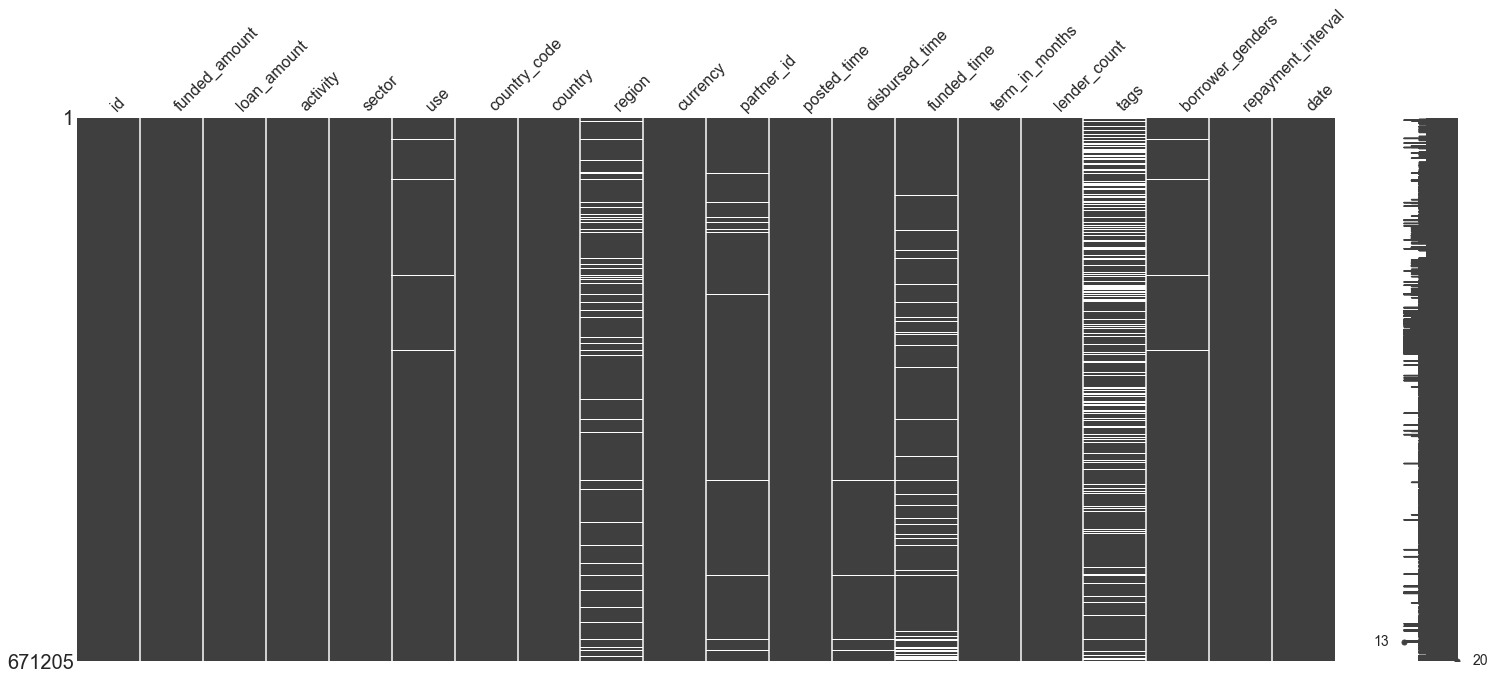

In [1196]:
msno.matrix(df_kiva_loans)
#структурное содержание пропущенных значений, т.е. их распределение внутри датасэта

Resume:<br>
The tag column contains a lot of missing values. The column with the date of collection of the requested amount on the Kiva platform, has about 8% of miss-outs. This can mean either that the amount has not yet been collected or that it has been reflected incorrectly in the upload. 

<br><br>**Dataset data profiling** (Reviewing each attribute of the dataset and displaying a number of statistics for each of them).

In [1197]:
df_kiva_loans.dtypes #названия столбцов и типы данных в них

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [1198]:
df_kiva_loans.describe(include=[np.number]) #описание данных относящихся к числовым значениям

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [1199]:
df_kiva_loans.describe(include=[np.object]) 
#описание данных относящихся к строковым значениям:
#количество значений / из них уникальных / самое частое значение / частота этого значения

,activity,sector,use,country_code,country,region,currency,posted_time,disbursed_time,funded_time,tags,borrower_genders,repayment_interval,date
count,671205,671205,666973,671197,671205,614405,671205,671205,668809,622874,499789,666984,671205,671205
unique,163,15,424912,86,87,12695,67,667399,5719,498007,86719,11298,4,1298
top,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,user_favorite,female,monthly,2017-03-20
freq,72955,180302,5217,160441,160441,10000,160440,25,2800,33,27088,426502,342717,1308


**The first obvious results and conclusions:**
- This dataset contains data on 87 countries on almost every continent where people requested assistance to fund projects.
- The country with the largest amount of loans is Philippines.
- Agriculture is the most popular category.
- There is a fairly large range of values for a number of numeric attributes, incl. loan amount or loan maturity.
- This dataset contains 11,298 various sex values! This is obviously impossible. It is necessary to understand why we got this number of values. We remember that to perform high-quality analytics we need to understand the analyzed product. Therefore, the answer to this question is crucial.
- The world’s average funding amounts to $\$$786, median funding – $\$$450. It might mean that there is a small share of applications with large amounts. It may be worth trying to understand who and why could need such amounts and how quickly the money reached the applicant after application publication.
- More importantly, there are only 1,298 various dates of publication of loan applications. If we calculate the ratio, we’ll see that it means that Kiva grants over 500 loans daily. This gives us a clear idea how important this crowd-sourcing platform is and what influence it has. 

## Kiva users
***
Identification of the main demographic characteristics that can be obtained from the data (place of residence / gender / purpose of the requested funding).

### 1. Location
***
To get the most tangible results (in terms of statistics) we will leave only those countries that make up at least 0.5% of the Kiva community.

In [1200]:
countries = df_kiva_loans['country'].value_counts()[df_kiva_loans['country'].value_counts(normalize=True)> 0.005]
list_countries = list(countries.index)

In [1201]:
countries

Philippines      160441
Kenya             75825
El Salvador       39875
Cambodia          34836
Pakistan          26857
Peru              22233
Colombia          21995
Uganda            20601
Tajikistan        19580
Ecuador           13521
Paraguay          11903
Nicaragua         11781
India             11237
Vietnam           10843
Nigeria           10136
Bolivia            8806
Lebanon            8792
Armenia            8631
Palestine          8167
Samoa              7396
Guatemala          7310
Rwanda             6735
Mali               6639
Honduras           6557
Indonesia          6214
United States      6093
Kyrgyzstan         5774
Togo               5749
Mexico             5741
Sierra Leone       5415
Tanzania           5219
Ghana              4374
Jordan             4167
Zimbabwe           4034
Madagascar         3821
Liberia            3682
Haiti              3618
Mozambique         3483
Name: country, dtype: int64

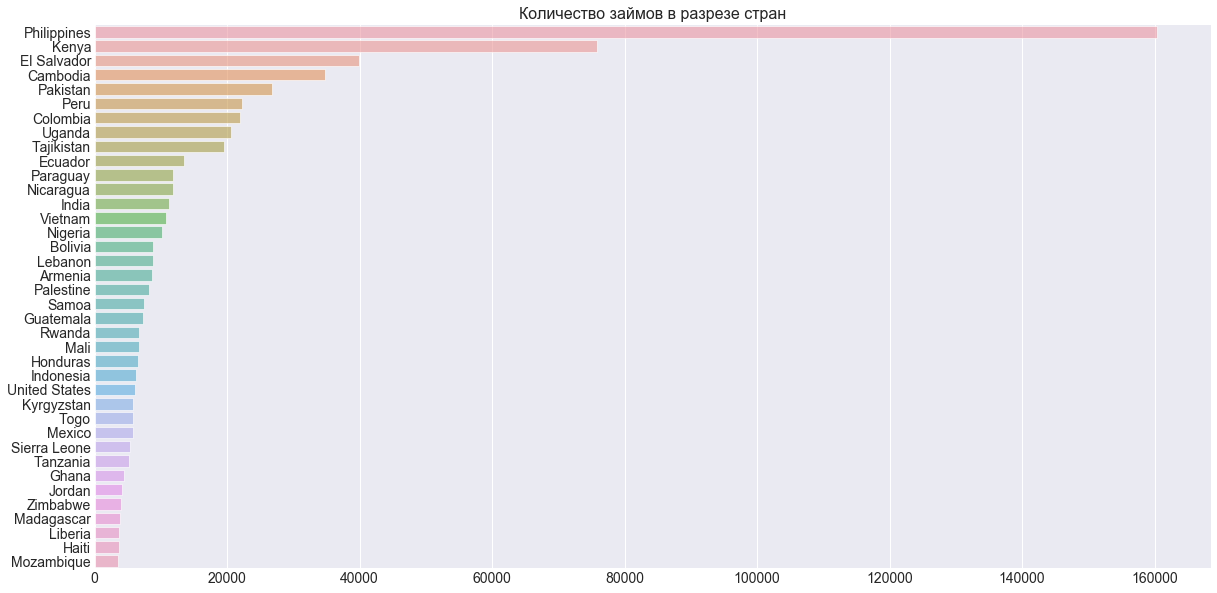

In [1202]:
plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе стран", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.show()

**Why is the largest amount of loans issued in Philippines?**<br>
<br>
A little less than a quarter of all the loans is issued in Philippines.<br>
It might be due to wide occurrence of short-term and small loans there. Let’s remember this assumption to have a closer look at it later. This strategy might be the most efficient for targeted and extensive financing on the background of poverty and limited capacities of local states.<br>
We can also notice that the list includes many African countries, such as Kenya, Mali, Nigeria, and Ghana. However, there are no European Countries at all. The presence of the United States on this list was surprising, since the level of poverty in the country differs from that in other countries.

<br>**Groupings of countries by parts of the world:**

In [1203]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [1204]:
df_mpi_grouped = df_mpi\
    .groupby(['ISO', 'country', 'world_region'])['MPI']\
    .mean()\
    .fillna(0)\
    .reset_index()

In [1205]:
df_kiva_loans = df_kiva_loans.merge(df_mpi_grouped, how='left', on='country')

In [1206]:
regions = df_kiva_loans['world_region'].value_counts()

In [1207]:
regions_list = regions.index.to_list()

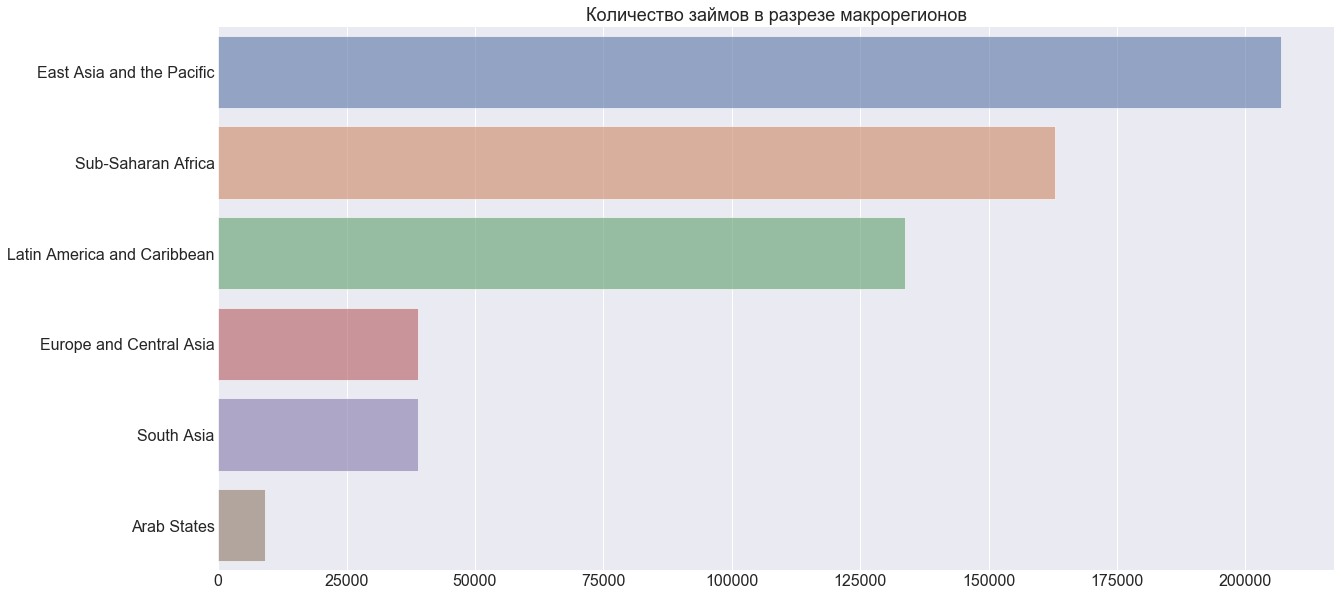

In [1208]:
plt.figure(figsize=(20,10))
sns.barplot(y=regions.index, x=regions.values, alpha=0.6)
plt.title("Количество займов в разрезе макрорегионов", fontsize=18)
plt.tick_params(labelsize=16)
plt.show();

There are three obvious leaders and three obvious outsiders in terms of the number of the issued loans.

With that in mind, we can assume that either there is no urgent need for Kiva in the three outsider regions (relatively rich regions) or it has not yet gained the same popularity as we see in the three leading regions. Since the Arab countries are on the list, the former assumption seems to be fair.

### 2. Gender indicators
***

In [1209]:
df_kiva_loans['borrower_genders'].value_counts()

female                                                                                                                                                                                                                                                                  426502
male                                                                                                                                                                                                                                                                    134710
female, female                                                                                                                                                                                                                                                           12164
female, female, female                                                                                                                                                                     

In many loans, the borrower is not actually one person, but a group of people engaged in a common project. They are listed as “woman, woman, woman” or “man, woman” in the dataset. This explains the 12k sexes we found earlier: each such combination is accounted for separately.

Let’s make a pie chart using the **group** mark for borrowers who make up a group of people.

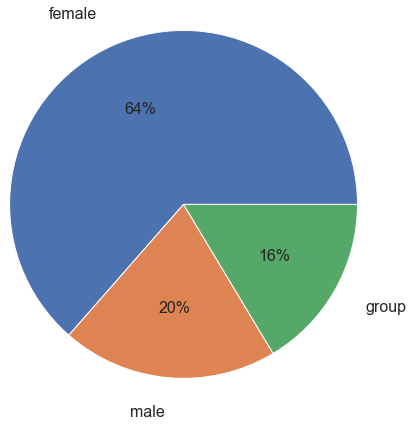

In [1210]:
df_kiva_loans['borrower_genders'] = [elem if elem in ['female','male'] else 'group' for elem in df_kiva_loans['borrower_genders'] ]
df_kiva_loans['borrower_genders']
borrowers = df_kiva_loans['borrower_genders'].value_counts()
borrowers
plot = borrowers.plot.pie(fontsize=16, autopct='%1.0f%%', labeldistance=1.2, radius=2)

It turns out that the majority of borrowers are women, which could mean, for example, that women are using Kiva to get funding and develop their own projects in the countries (most of which are third world countries) where traditionally women have found it extremely difficult to do so.

<br>**Identifying the countries with women as the majority of borrowers**

In [1213]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['female', 'male'])[-20:]

df_gender_by_country = df_gender_by_country[['female', 'male', 'group']]
df_gender_by_country

borrower_genders,female,male,group
country,,,
Sierra Leone,57.266851,7.959372,34.773777
Indonesia,58.046347,21.097522,20.856131
Colombia,58.458741,38.008638,3.532621
El Salvador,58.771160,39.791850,1.436991
Lebanon,60.748408,27.070064,12.181529
Armenia,62.368208,37.597034,0.034758
Jordan,63.618910,34.557235,1.823854
Kenya,65.570722,19.564787,14.864491
Zimbabwe,66.633614,3.891919,29.474467


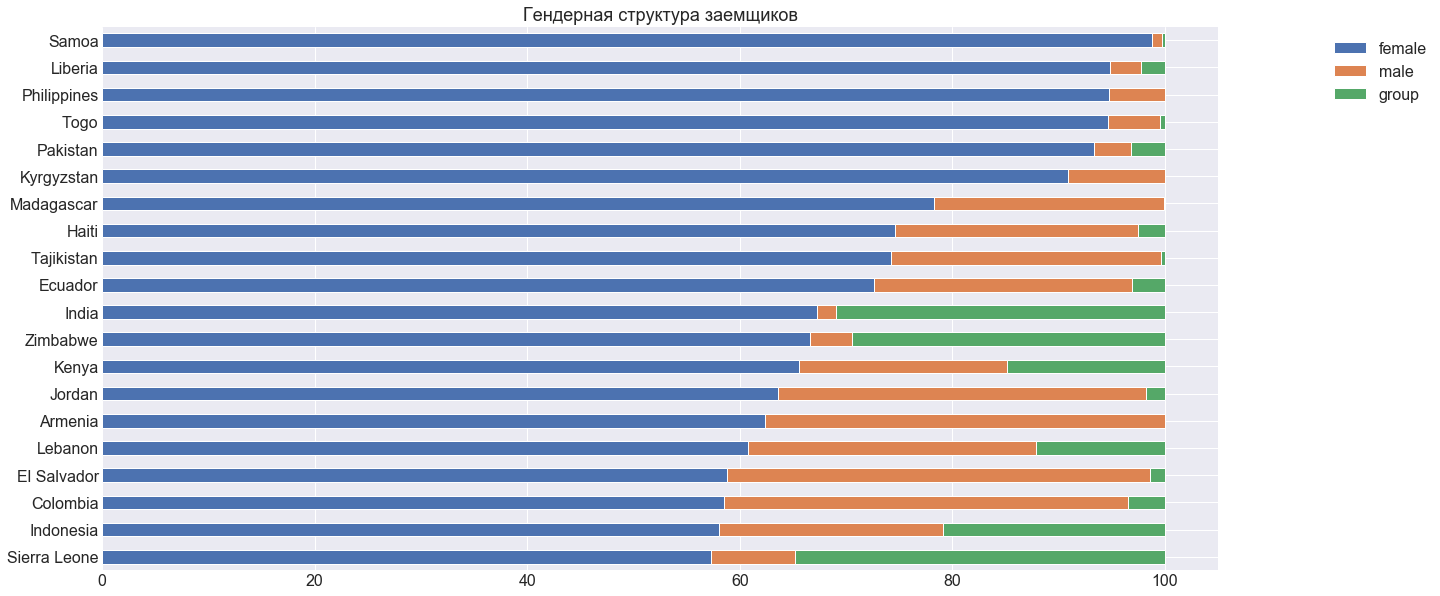

In [1214]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

**What could be the reason for the prevailing share of women in the structure of borrowers by country?**

For example, in connection with the areas traditionally associated with women: various types of catering and snack bars, clothing and household goods stores, household services, and growing crops.<br>
Patriarchate turned out to be the predominant social concept within the list of countries. Women in such a social concept, unfortunately, still have a minor role in decision-making. Kiva gives greater opportunities and possibilities in the regions where it was hardly possible before.

<br>**Identifying countries with men as the majority of borrowers**

In [1215]:
df_gender_by_country = \
    df_kiva_loans[df_kiva_loans['country'].isin(countries.index.values)]\
    .groupby(['country', 'borrower_genders'])['borrower_genders']\
    .count()\
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())\
    .unstack('borrower_genders')\
    .fillna(0)\
    .sort_values(by=['male','female'])[-20:]

df_gender_by_country = df_gender_by_country[['male', 'female', 'group']]
df_gender_by_country

borrower_genders,male,female,group
country,,,
Madagascar,21.617378,78.304109,0.078513
Haiti,22.830293,74.599226,2.570481
Rwanda,22.865627,34.387528,42.746845
Ecuador,24.236373,72.635160,3.128467
Tajikistan,25.459653,74.182840,0.357508
Lebanon,27.070064,60.748408,12.181529
Bolivia,27.367704,42.414263,30.218033
Nicaragua,28.698752,50.072150,21.229098
Honduras,31.401556,57.023029,11.575416


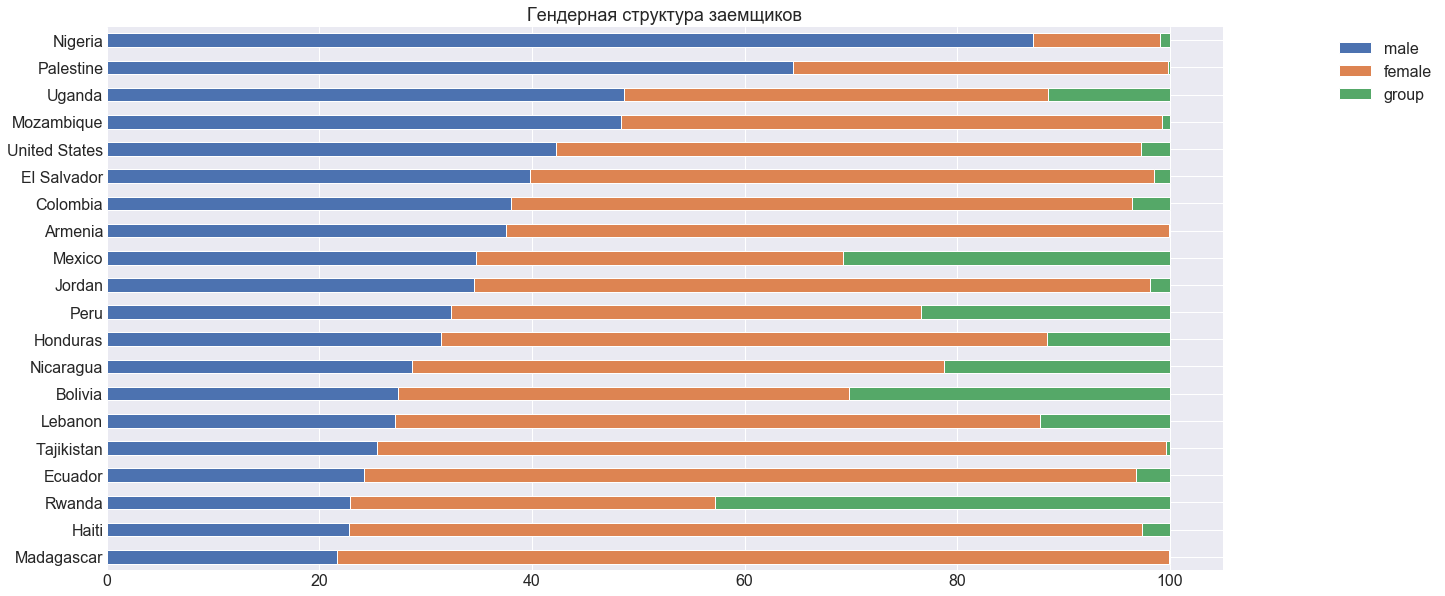

In [1216]:
plot = df_gender_by_country.plot.barh(
        figsize=(20,10)
        , fontsize=16
        , stacked=True
        , title='Гендерная структура заемщиков')
plot.title.set_size(18)
plot.legend(loc=1, bbox_to_anchor=(1.2, 1), fontsize=16)
plot.set(ylabel=None, xlabel=None)
plt.show()

The percent of male borrowers is significant in **Nigeria** and **Palestine**. This, unfortunately, is not surprising since these countries are super-patriarchal. Just like **Uganda** and **Mozambique**, where, however, the number of women and men is more comparable with each other. Of course, this may be because men in these countries have less need/motivation to use the Kiva service. But in any case, it is undeniable that Kiva allows people to get more opportunities and possibilities in those regions where it was hardly possible before. 

<br>

## Number of loans
***
Identifying purposes and amounts of loans requested by people.

### 1. By sectors
***
Let’s start with economy sectors. In the summary above, there were 15 unique sectors. Let’s have a look at each of them.

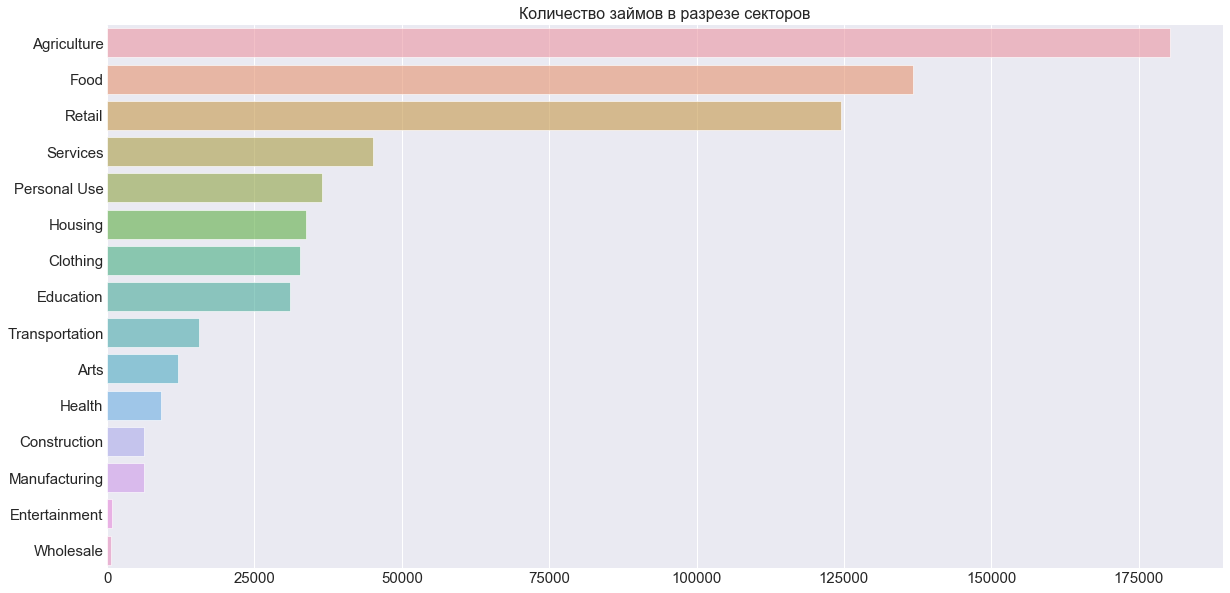

In [1217]:
sectors = df_kiva_loans['sector'].value_counts()

plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе секторов", fontsize=16)
# plt.xlabel('Number of loans', fontsize=16)
# plt.ylabel("Sectors", fontsize=16)
plt.tick_params(labelsize=15)

sns.barplot(y=sectors.index, x=sectors.values, alpha=0.6)
plt.show()

The dominating sector is **agriculture**, followed by **food industry** and **trade**, which is of no wonder considering the list of countries – active users of Kiva. For instance, brief review of the first pages of the site reveals such examples as purchase of high-quality seeds and fertilizers for farm and in horticultural business; purchase of fresh food, cereals, fish, and vegetables to enable operation of a public catering business. A number of conclusions can be made about the structure of the economies of these countries, indicating that these are purely developing countries that rely mainly on the agricultural sector.

It is important to note that loans for **personal needs** also take a significant share. This means that there are people who use Kiva because they are in extreme need.
Less share is taken by **construction**, **manufacturing**, **entertainment** and **wholesale**.

### 2. By type of activity
***
Let's study the more detailed version and make calculation for the types of activities.

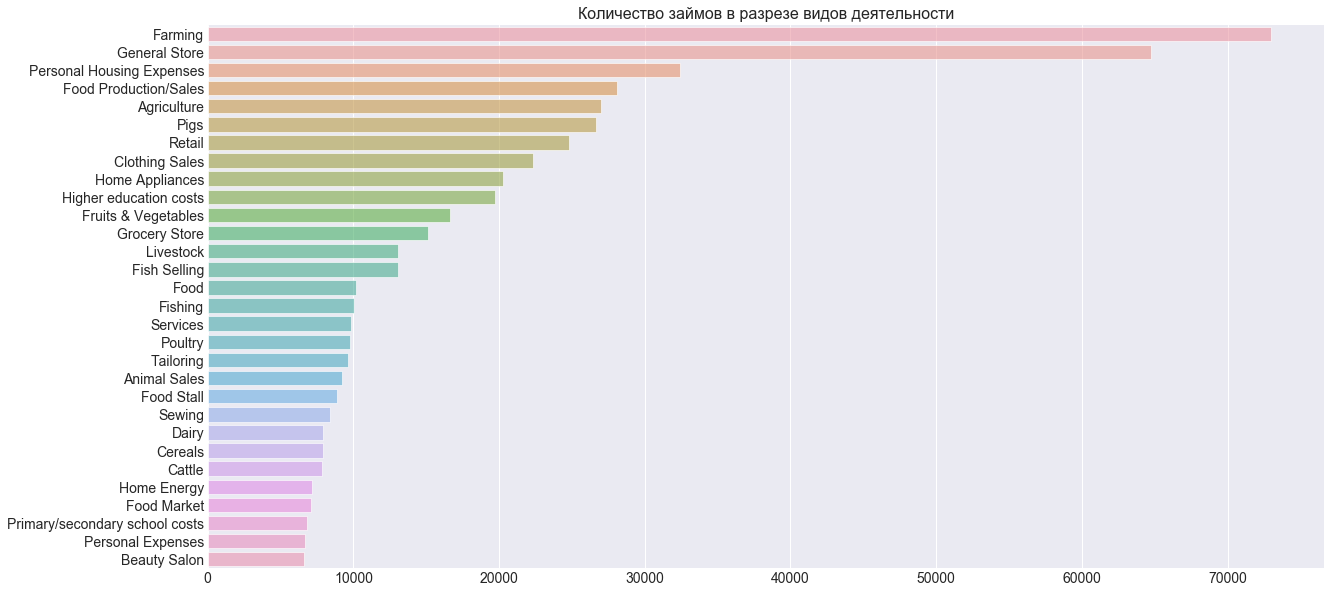

In [1218]:
activities = df_kiva_loans['activity'].value_counts().head(30)

plt.figure(figsize=(20,10))
plt.title("Количество займов в разрезе видов деятельности", fontsize=16)
plt.tick_params(labelsize=14)

sns.barplot(y=activities.index, x=activities.values, alpha=0.6)
plt.show();

Detailing by type of activity confirms our observations. The leaders are **farming**, **retail stores**, **households**, and **housing expenses**.

### 3. Loan Purpose Rating
***

In [1219]:
activities = df_kiva_loans['use'].value_counts().head(25)
activities.head(25)

to buy a water filter to provide safe drinking water for their family.                                                          5217
to buy a water filter to provide safe drinking water for her family.                                                            4082
To buy a water filter to provide safe drinking water for their family.                                                          2141
to build a sanitary toilet for her family.                                                                                      1708
to build a sanitary toilet for her family                                                                                       1599
to buy ingredients for her food production business                                                                             1419
to purchase more groceries to sell.                                                                                             1409
to buy feed and other supplies to raise her pigs.                    

As is seen, the leaders in terms of purpose are things that satisfy basic human needs, such as **buying a water filter, septic tank equipment or solar-powered lamps**.

### 4. Most popular activities
***
Now let’s compare the most popular types of loans. To do so, let’s group the loans by sector and activity and look at the top-10 in each group.

In [1220]:
loans_by_activity_sector = \
    df_kiva_loans[df_kiva_loans['sector'].isin(sectors[:9].index.values)]\
    .groupby(['sector', 'activity'])['loan_amount']\
    .count()\
    .reset_index()

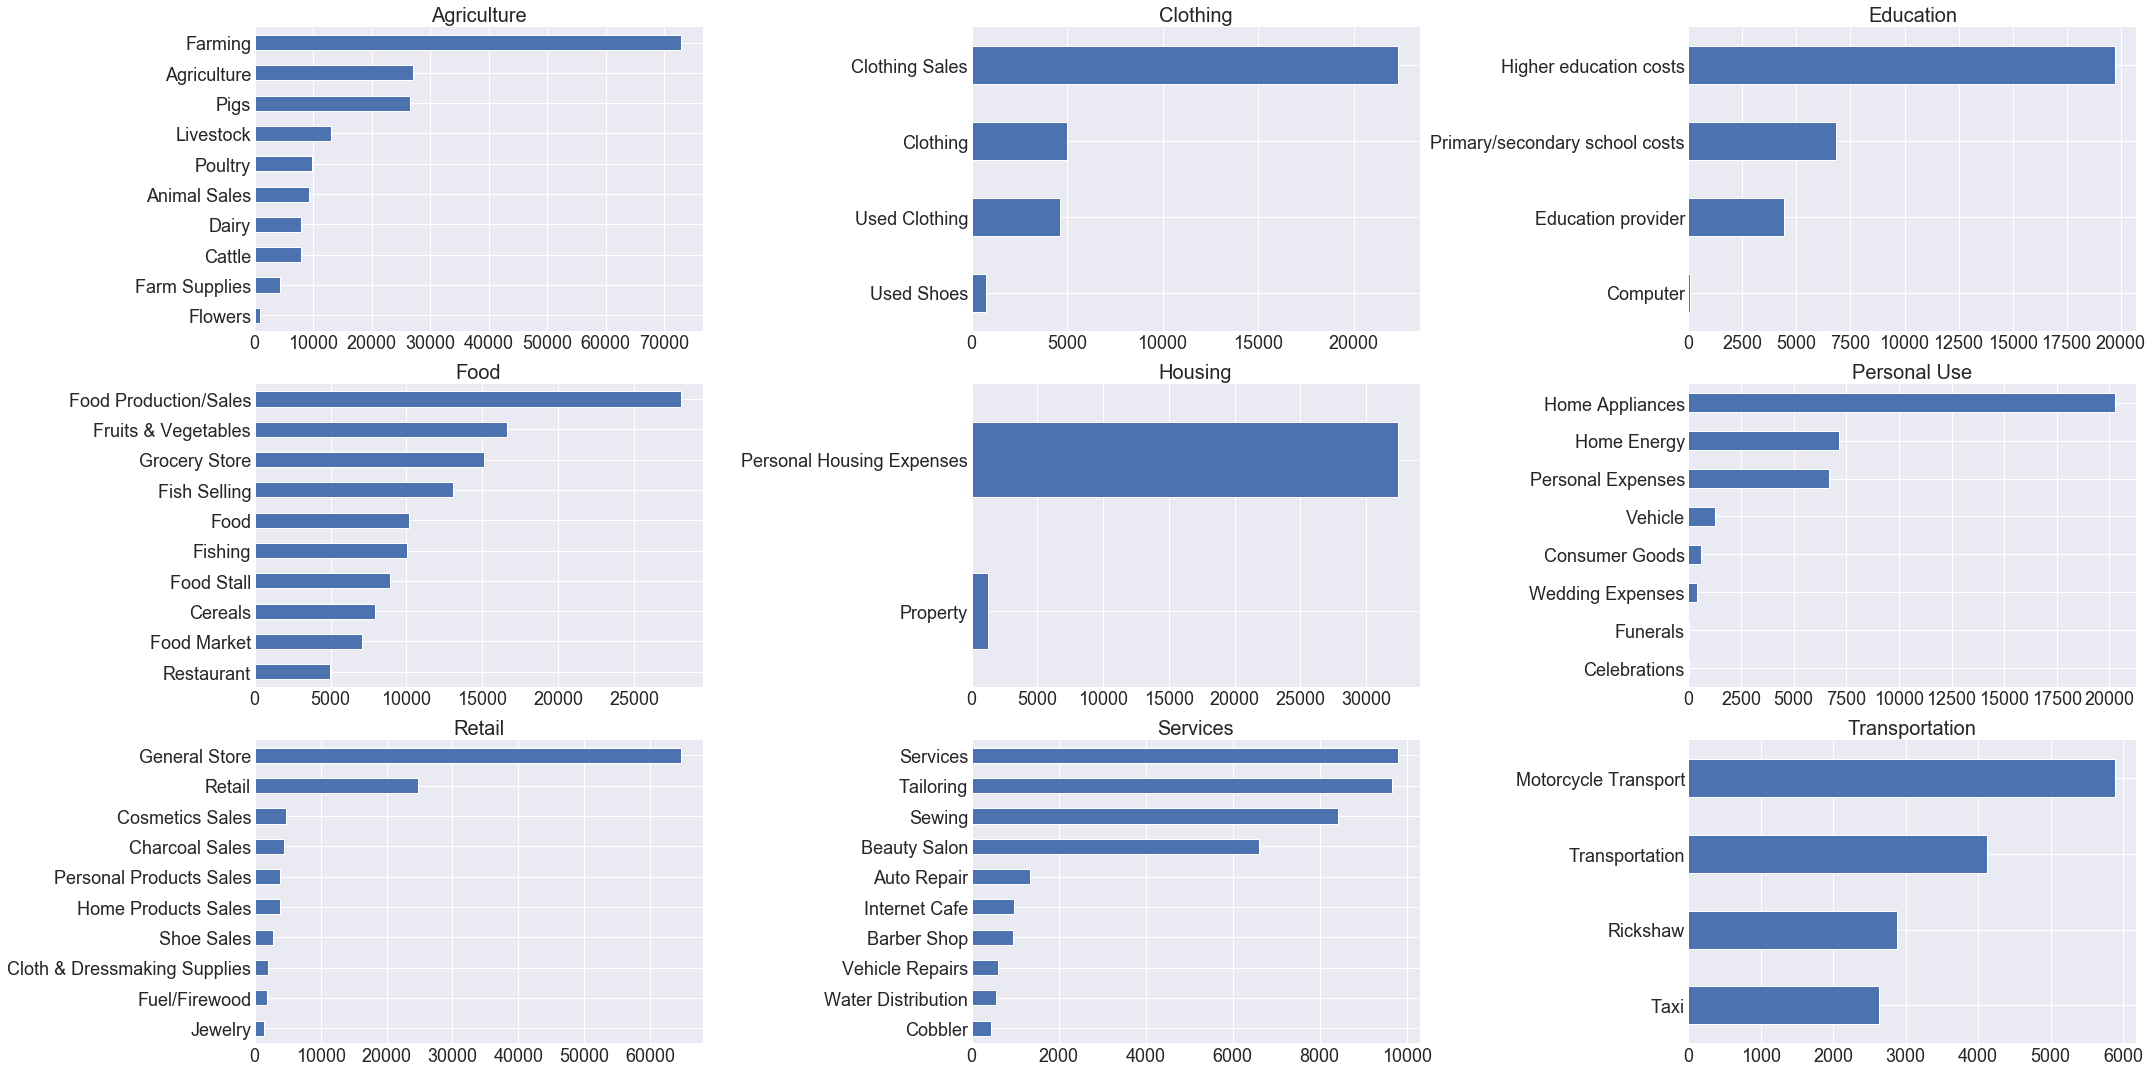

In [1221]:
fig,axes = plt.subplots(3,3, sharex=False, squeeze=False, figsize=(30,15))

for ax,q in zip(axes.ravel(), loans_by_activity_sector.sector.unique()):
    tmp_df = loans_by_activity_sector[loans_by_activity_sector.sector.eq(q)]\
                .dropna()\
                .sort_values(by='loan_amount')[-10:]
    ax.set_title(q, fontsize=20)  
    ax.yaxis.label.set_visible(False)
    plt.tight_layout()
    
    tmp_df.plot.barh(x='activity', ax=ax, legend=None, fontsize=18)

The main conclusion is that the vast majority of loans are directed to the activities with low added value – agriculture, retail trade, servicing. That is, activities in which adjacent sectors of the economy are minimally involved and the potential for creating additional jobs and products within the country is low, in contrast to, for example, manufacturing enterprises, construction, craft workshops, and light industry.

Nevertheless, the presence of such area as education: financing of education at schools and universities, running and preparing courses and educational programmes is good news.

## Scope of financing
***

### 1. Distribution of the loan amount
***
Displaying the distribution of loan amounts on the chart (absolute values of loans requested by people in various countries to achieve their goals may give important information).

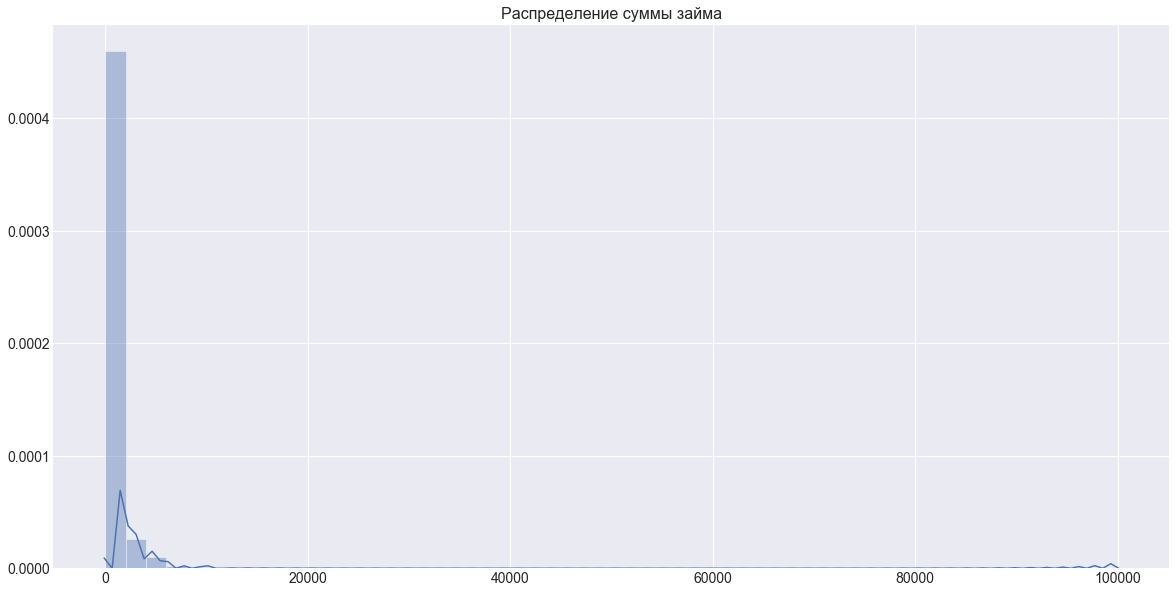

In [1222]:
plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа", fontsize=16)
plt.tick_params(labelsize=14)

sns.distplot(df_kiva_loans['loan_amount'], axlabel=False)
plt.show()

There are a number of limit values (outliers). They distort the distribution, and the chart is not very descriptive in this form: we need to truncate the data, excluding outliers from consideration. How can it be done?

I suggest using a basic but very powerful rule: the three-sigma rule — **68–95–99.7**. This rule states that for a normal distribution:

* 68.27% of values $ \in [\mu - \sigma , \mu + \sigma]$
* 95.45% of values $ \in [\mu - 2\sigma , \mu + 2\sigma]$
* 99.7% of values $ \in [\mu - 3\sigma , \mu + 3\sigma]$
<br>where $\mu$ and $\sigma$ are the mean and standard deviation of the normal distribution.

It is true here that the distribution is not necessarily normal, but for a shape like the one we have, applying a third filter, as we will see, will greatly improve the quality of the analysis.

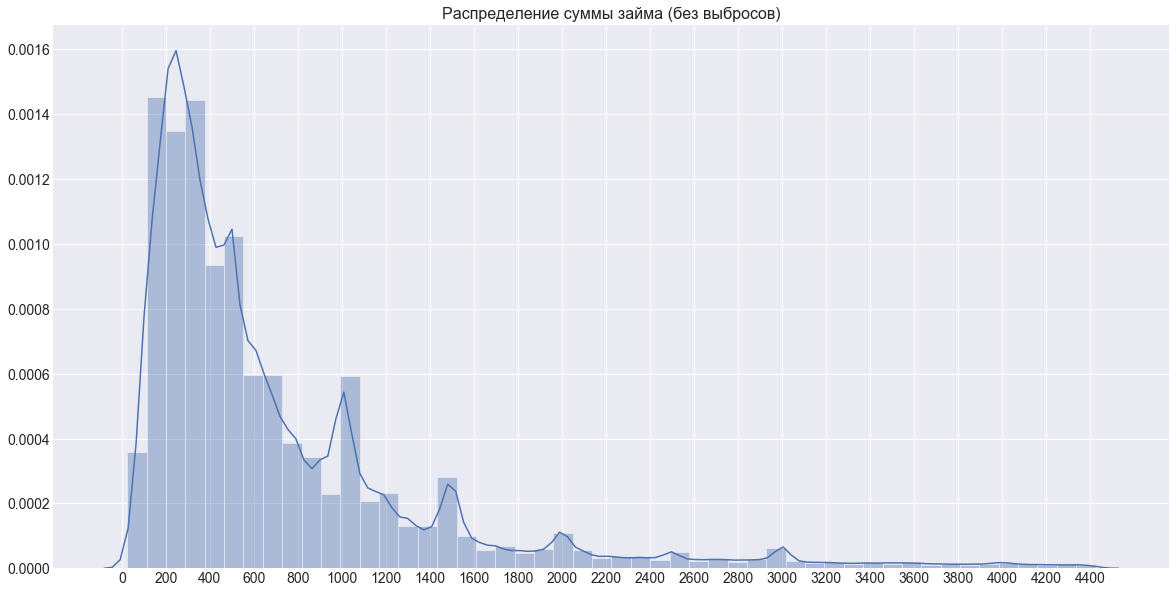

In [1223]:
# Наблюдаемое отклонение от среднего
dev = (df_kiva_loans['loan_amount']-df_kiva_loans['loan_amount'].mean()).abs()
# Стандартное отклонение
std = df_kiva_loans['loan_amount'].std()
# Фильтруем исходный набор данных
df_kiva_loans_trimmed = df_kiva_loans[~(dev>3*std)]

plt.figure(figsize=(20,10))
plt.title("Распределение суммы займа (без выбросов)", fontsize=16)
plt.tick_params(labelsize=14)
plt.xticks(np.arange(0, max(df_kiva_loans_trimmed['loan_amount']+1), 200))

sns.distplot(df_kiva_loans_trimmed['loan_amount'], axlabel=False)
plt.show()

- Most loans are between $\$$100 and $\$$600, with peaks between $\$$200 and $\$$400.
- The amount, of course, decreases, but we notice several peaks in $\$$1,000 (the most distinct one), $\$$1,500 and $\$$2,000. It can be assumed that there is a certain class of projects that are more ‘complex’ and funded by larger amounts.

### 2. Loan amount by sectors
***

**Identification of loan amounts by economy sectors**:

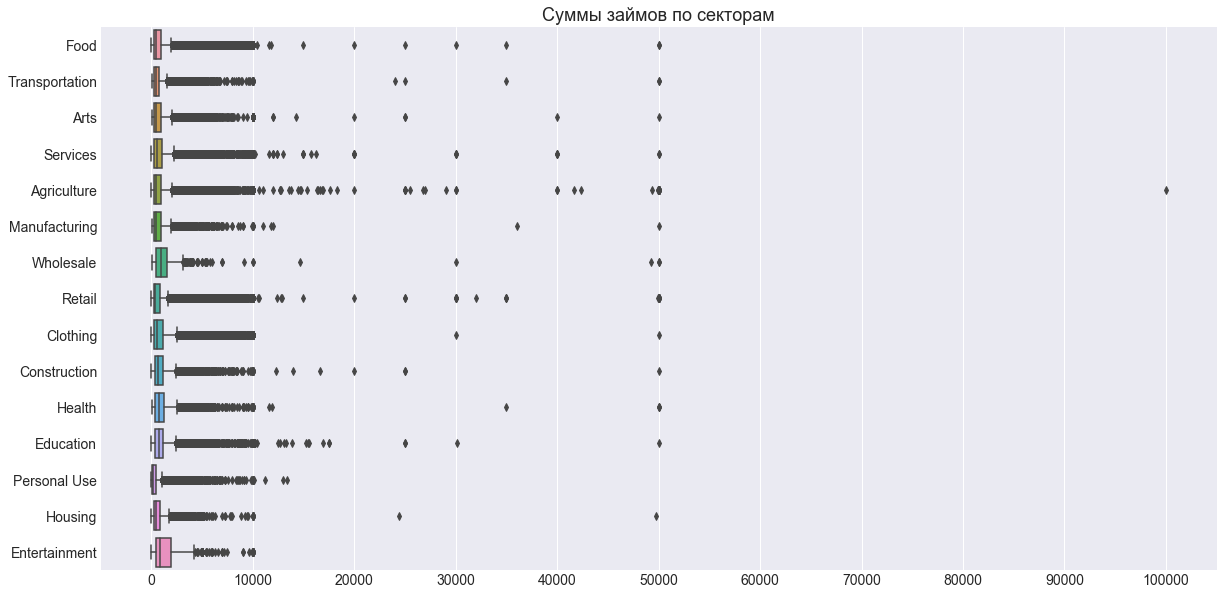

In [1224]:
plt.figure(figsize=(20,10))
plt.title("Суммы займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 10000))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="sector", data=df_kiva_loans).set(ylabel=None, xlabel=None)
plt.show()

As is seen, there are outlier values for any sector; and for almost all sectors, except for personal needs and the entertainment industry, there are loans for about $\$$50,000. For example, it seems like someone requested a loan of $\$$100,000 for an agricultural project. <br>There are also many loans amounting to $\$$20,000,  $\$$50,000.

<br>**Let’s study several loans for large amounts**: 
- What can be said about the purpose of these applications?
- In which counties they were issued?
- What is the gender of the applicants?

In [1225]:
large_sums = df_kiva_loans[df_kiva_loans['loan_amount'] >= 50000]
large_sums = large_sums[['loan_amount','borrower_genders','country','sector','use']]
large_sums = large_sums.sort_values(['loan_amount','borrower_genders','country'], ascending = (False,True, True))
large_sums.head()

,loan_amount,borrower_genders,country,sector,use
70499,100000.0,female,Haiti,Agriculture,create more than 300 jobs for women and farmer...
631904,50000.0,female,Cote D'Ivoire,Agriculture,double cashew nut export output and hire about...
565733,50000.0,female,Ecuador,Agriculture,to pay 600 farming families 100% above market ...
614922,50000.0,female,Ghana,Services,to set up 13 new clean water businesses in nor...
657346,50000.0,female,Ghana,Services,Impact Hub Accra improve its innovation and en...


The largest loan of $\$$100,000 was requested by a woman from Haiti for the Agriculture sector and was intended to create more than 300 jobs, which explains the amount of funds requested.

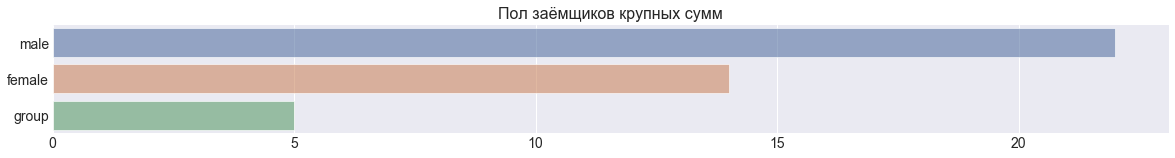

In [1226]:
gen_cnt = large_sums['borrower_genders'].value_counts()

plt.figure(figsize=(20,2))
plt.title("Пол заёмщиков крупных сумм", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=gen_cnt.index, x=gen_cnt.values, alpha=0.6)
plt.show()

The number of male borrowers of large amounts exceeds the number of female borrowers by about one and a half times.<br><br>

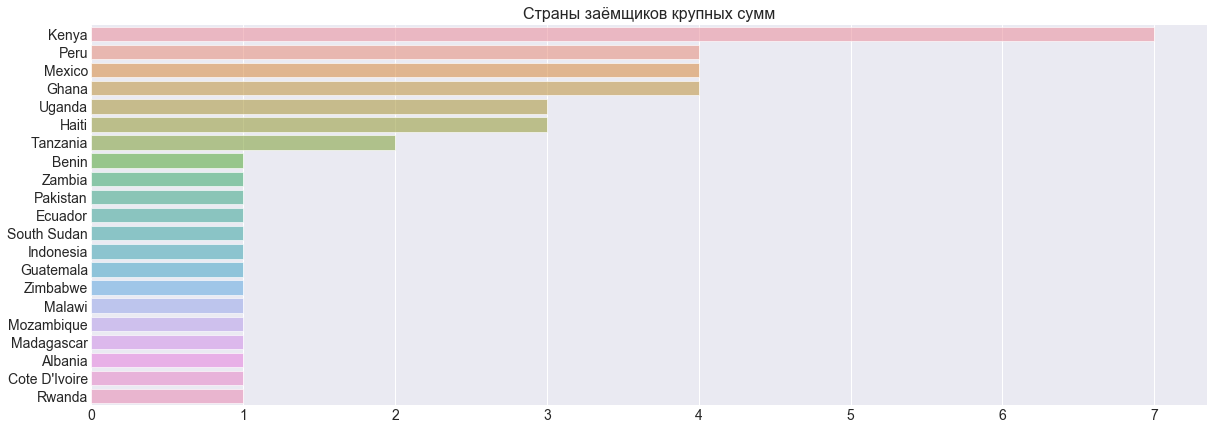

In [1227]:
country_cnt = large_sums['country'].value_counts()

plt.figure(figsize=(20,7))
plt.title("Страны заёмщиков крупных сумм", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=country_cnt.index, x=country_cnt.values, alpha=0.6)
plt.show()

The biggest number of people requiring large amounts are in African countries. Kenya is the leader among all the countries in terms of the number of people with loans amounting to over $\$$50,000.<br><br>

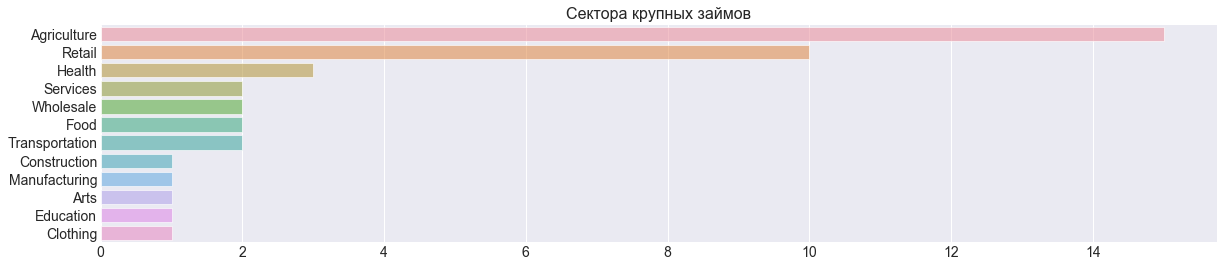

In [1228]:
sector_cnt = large_sums['sector'].value_counts()

plt.figure(figsize=(20,4))
plt.title("Сектора крупных займов", fontsize=16)
plt.tick_params(labelsize=14)
sns.barplot(y=sector_cnt.index, x=sector_cnt.values, alpha=0.6)
plt.show()

These amounts were required primarily for the agricultural and retail sectors.<br><br>

Identification of **average** and **median values** of loan amounts **by sectors**:

In [1229]:
sector_mean_median = df_kiva_loans\
    .groupby(['sector'])['loan_amount']\
    .agg(median='median', mean='mean')\
    .sort_values(by='median', ascending=False)

sort_order = sector_mean_median.index.to_list()

sector_mean_median

,median,mean
sector,,
Wholesale,950.0,1569.716088
Entertainment,887.5,1673.674699
Education,725.0,998.565924
Health,725.0,1067.266616
Construction,700.0,1068.147735
Clothing,600.0,1139.237829
Services,550.0,1064.631148
Agriculture,500.0,793.490228
Housing,500.0,701.549020


<br>**Elimination of outliers and displaying on the chart**:

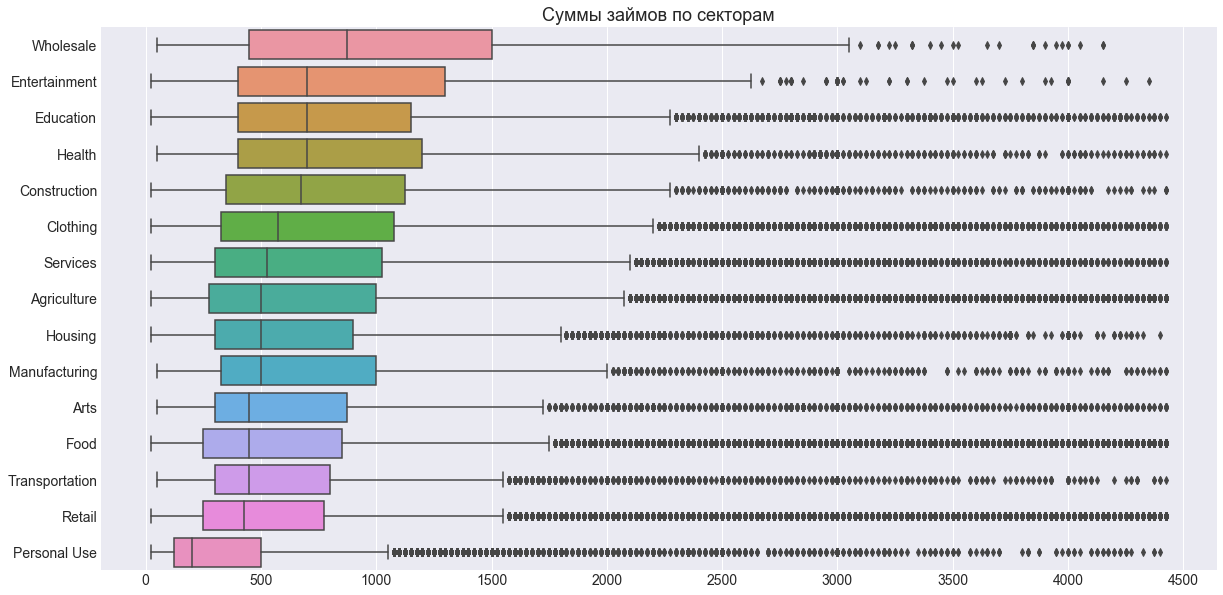

In [1230]:
plt.figure(figsize=(20,10))
plt.title("Суммы займов по секторам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="sector", order=sort_order, data=df_kiva_loans_trimmed).set(ylabel=None, xlabel=None)
plt.show()

First, it should be noted that it is the median that gives an outlier-resistant estimate of the central position of the loan amount.

The chart shows that the median of the amount of applications for **personal needs** has the smallest value. Personal needs include household articles and essential supplies, providing a house with energy, heat and water. It is this group of applications that may indicate cases of extreme need and poverty in different countries.

The other side of the sector chart with the largest values of the median of the loan amount includes **wholesale** obviously requiring significant purchase costs, **education** and **healthcare**, along with the **entertainment industry**.<br><br>

### 3. Distribution by macroregions
***

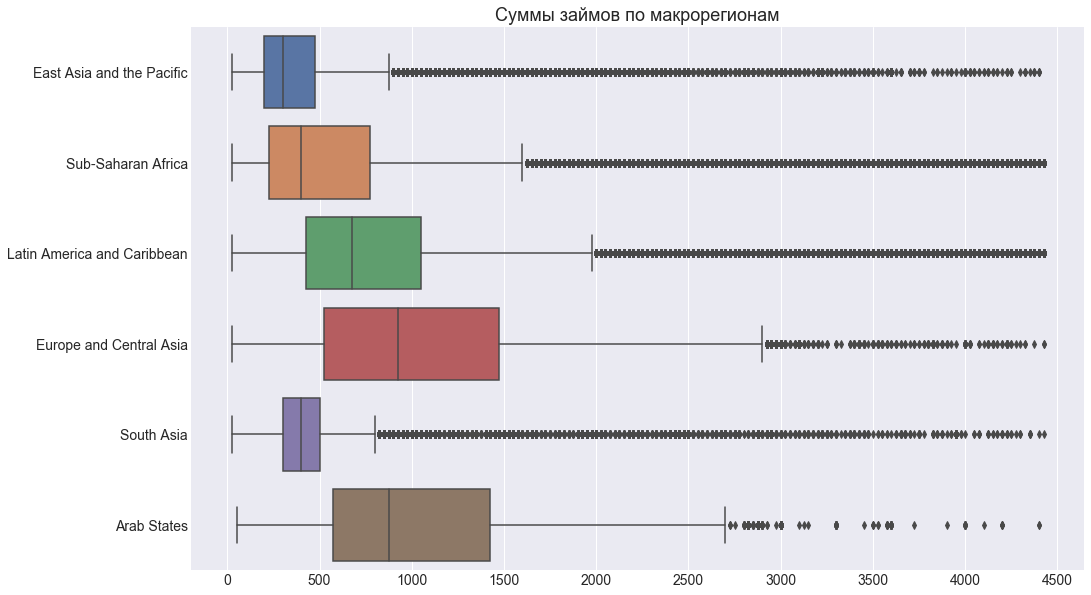

In [1231]:
plt.figure(figsize=(16,10))
plt.title("Суммы займов по макрорегионам", fontsize=18)
plt.xticks(np.arange(0, max(df_kiva_loans['loan_amount']+1), 500))
plt.tick_params(labelsize=14)

sns.boxplot(x='loan_amount', y="world_region", order=regions_list, data=df_kiva_loans_trimmed)\
    .set(ylabel=None, xlabel=None)
# plt.legend(loc=1, bbox_to_anchor=(1.15, 1), fontsize=16)
plt.show()

The regions are arranged in descending order in terms of the number of loans.

Most likely, those regions with lower medians are generally poorer and require funding with short-term, small, but frequent loans. This is namely what we are witnessing in the **South-East Asia** region with **Philippines** and **Cambodia** as leaders.

However, this chart also shows a region staying out of the sequence – South Asia, in particular, such countries as **Pakistan** and **India**. It is likely that this region has an excellent platform for expanding the market share and support from the Kiva society.
Search for a connection between countries (macroregions), gender of the borrower and the amount of the application.<br><br>

**Search for a connection between countries (macroregions), gender of the borrower and the amount of the application.**

In [1232]:
gen_reg_loan_tmp = df_kiva_loans.groupby(["world_region","borrower_genders"])#.median("loan_amount")
gen_reg_loan = gen_reg_loan_tmp.agg("median")
df_gen_reg_loan = gen_reg_loan["loan_amount"].to_frame()
df_gen_reg_loan 

loan_amount
world_region                borrower_genders             
Arab States                 female                 1000.0
                            group                   950.0
                            male                    750.0
East Asia and the Pacific   female                  300.0
                            group                   200.0
                            male                    450.0
Europe and Central Asia     female                  900.0
                            group                  1000.0
                            male                   1000.0
Latin America and Caribbean female                  625.0
                            group                  1950.0
                            male                    600.0
South Asia                  female                  375.0
                            group                   825.0
                            male                   1050.0
Sub-Saharan Africa          female                  300.0
                            group                  1050.0
                            male                    350.0

In [1234]:
df_gen_reg_loan_reconst = df_gen_reg_loan.unstack(['borrower_genders']).sum(axis=1,level=['borrower_genders'])

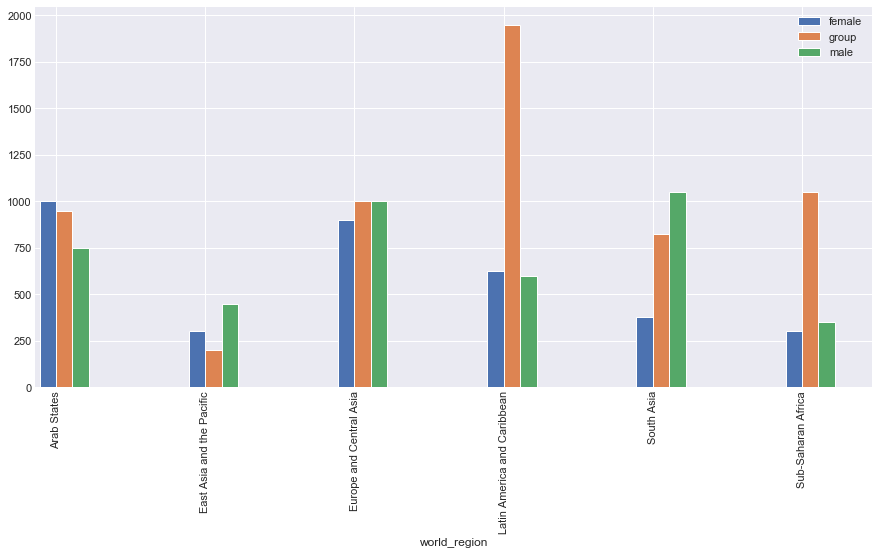

In [1299]:
import itertools
palette = itertools.cycle(sns.color_palette())

#spcify the relative position of each bar
n = len(list(df_gen_reg_loan_reconst))
positions = np.linspace(n/3., -n/3., n)

# plot each column individually
for i,col in enumerate(list(df_gen_reg_loan_reconst)):
    c = next(palette)
    pos = positions[i]
    df_gen_reg_loan_reconst[col].plot(kind='bar',position=pos, color=c, width=0.11, figsize=(15, 7))

plt.legend()
plt.show()

In most regions, women ask for a slightly lower loan amount for their needs than men. This might be due to the fact that in the Asian and Muslim countries, women still play a minor role in decision-making and this, in one way or another, affects their worldview. Even in many regions of Russia, women with the same skill level as men ask for lower wages, which still passes for norm. Herewith, we see that in the Arab states, the median loan level is higher for female users. Most likely, this is due to the fact that these countries are rich and have a high level of GDP; at the same time, women here also have a secondary role: work and business are generally men’s area, i.e., men earn more and have less need to use the Kiva service. Women, on the other hand, may consider Kiva a service that gives real prospects for greater opportunities for independent business.<br><br>

### 4. Dependence of the borrower’s gender on the region of the planet and economy sector
***

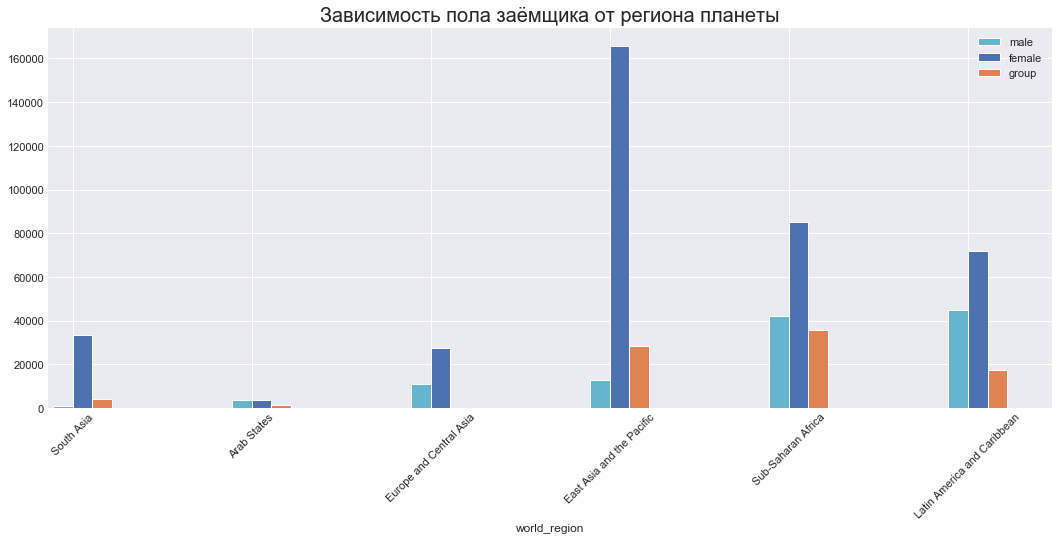

In [1256]:
regions = df_kiva_loans["world_region"].value_counts()[df_kiva_loans["world_region"].value_counts(normalize=True)> 0.005]
list_countries = list(regions.index)

df_gender_by_reg = \
    df_kiva_loans[df_kiva_loans["world_region"].isin(regions.index.values)]\
    .groupby(["world_region", 'borrower_genders'])['borrower_genders']\
    .count()\
    .unstack('borrower_genders')\
    .sort_values(by=['male','female'])

df_gender_by_reg = df_gender_by_reg[['male', 'female', 'group']]

#spcify the relative position of each bar
n = len(list(df_gender_by_reg))
positions = np.linspace(n/3., -n/3., n)

# plot each column individually
for i,col in enumerate(list(df_gender_by_reg)):
    c = next(palette)
    pos = positions[i]
    df_gender_by_reg[col].plot(kind='bar',position=pos, color=c, width=0.11, figsize=(18, 7), rot=45)
plt.title("Зависимость пола заёмщика от региона планеты", fontsize=20)
plt.legend()
plt.show()

In almost all macro-regions, the number of women using Kiva to get a loan is significantly bigger. Let’s consider the dependence of gender on the economy sector.
<br><br>

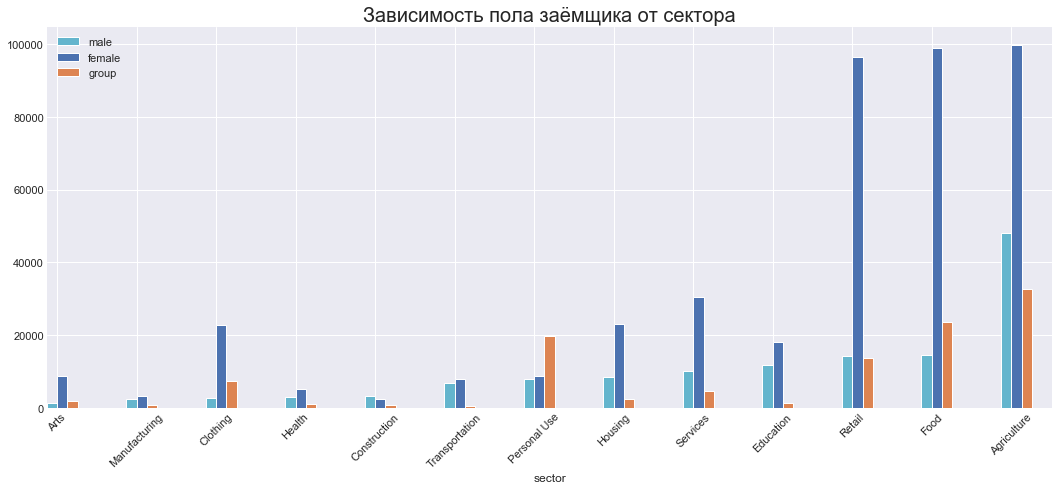

In [1266]:
sector = df_kiva_loans["sector"].value_counts()[df_kiva_loans["sector"].value_counts(normalize=True)> 0.005]
list_sector = list(sector.index)

df_gender_by_sector = \
    df_kiva_loans[df_kiva_loans["sector"].isin(sector.index.values)]\
    .groupby(["sector", 'borrower_genders'])['borrower_genders']\
    .count()\
    .unstack('borrower_genders')\
    .sort_values(by=['male','female'])

df_gender_by_sector = df_gender_by_sector[['male', 'female', 'group']]
sns.set_style("darkgrid")
#spcify the relative position of each bar
n = len(list(df_gender_by_sector))
positions = np.linspace(n/3, -n/3, n)

# plot each column individually
for i,col in enumerate(list(df_gender_by_sector)):
    c = next(palette)
    pos = positions[i]
    df_gender_by_sector[col].plot(kind='bar',position=pos, color=c, width=0.13, figsize=(18, 7), rot=45)

plt.title("Зависимость пола заёмщика от сектора", fontsize=20)
plt.legend()
plt.show()

Here we also see the overwhelming majority of women in all sectors. This may partly indicate the increasing emancipation of women in many regions, which is a very good sign for the development of the global society. On the other hand, it may also indicate that in some countries, men simply feel less need to use Kiva to achieve their goals. Nevertheless, the increased opportunities for professional development and personal growth of women (especially in patriarchal countries) is good news.
<br><br>

## Funds waiting time
***

* **posted_time**: corresponds to the date + exact hour of application publication on the site.
* **disbursed_time**: corresponds to the date + exact hour when the funds were actually received by the recipient.

1. We discard the rows with missing values for "disbursed_time" and get the columns in the correct format.
2. We calculate the interval between the dates.
3. The applications for which money is first actually issued by local agents and then published on the site are excluded from consideration.

In [1297]:
# drop na (missing) values
df_loans_dates = df_kiva_loans_trimmed.dropna(subset=['disbursed_time', 'funded_time'], how='any', inplace=False)

# dates columns:
dates = ['posted_time','disbursed_time']

# format dates:
df_loans_dates[dates] = df_loans_dates[dates].applymap(lambda x : x.split('+')[0])
df_loans_dates[dates] = df_loans_dates[dates].apply(pd.to_datetime)

# calculate time interval
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['disbursed_time']-df_loans_dates['posted_time']
df_loans_dates.loc[:, 'time_funding'] = df_loans_dates['time_funding'] / timedelta(days=1) 

# remove outliers +-3 sigma
dev = (df_loans_dates['time_funding']-df_loans_dates['time_funding'].mean()).abs()
std = df_loans_dates['time_funding'].std()

# Keep rows where time_funding interval > 0 only
df_loans_dates_trimmed = df_loans_dates[~(dev>3*std) & (df_loans_dates.loc[:, 'time_funding']>0)]

### 1. Days before full funding of the application
***

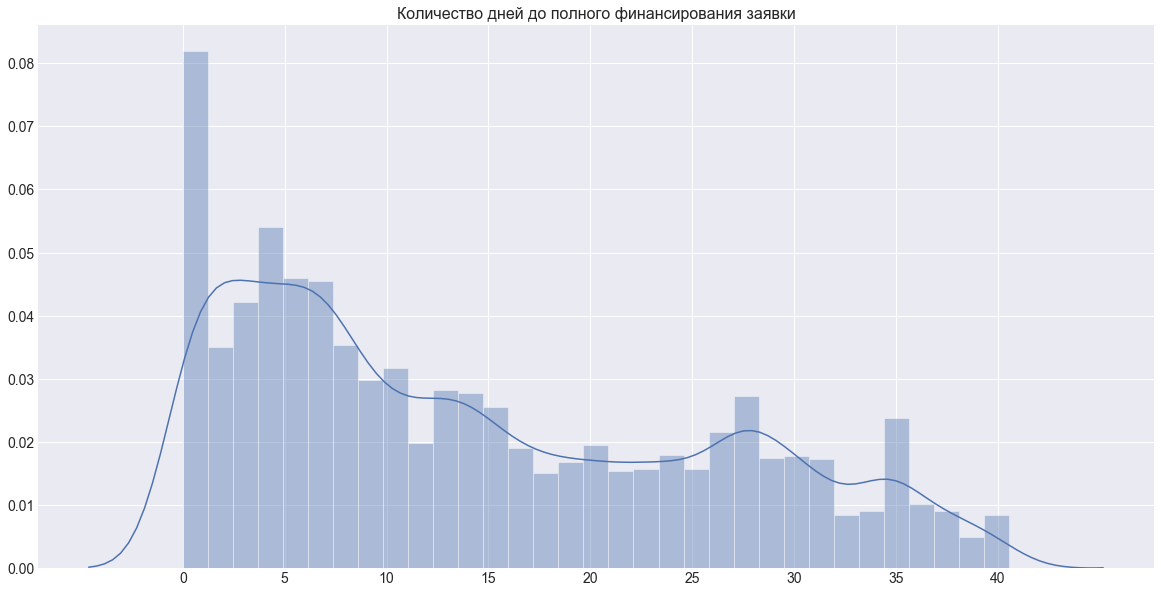

In [1237]:
plt.figure(figsize=(20,10))
plt.title("Количество дней до полного финансирования заявки", fontsize=16)
plt.xticks(np.arange(0, max(df_loans_dates_trimmed['time_funding']+1), 5))
plt.tick_params(labelsize=14)

sns.distplot(df_loans_dates_trimmed['time_funding']).set(ylabel=None, xlabel=None)
plt.show()

The majority of applications is funded within 10 days.

However, there are also peaks: 27, 35 days. It might indicate that some applications undergo quite a long funding process.<br><br>

### 2. Waiting time and loan amounts
***
Let’s display a **heat map** in order to visualize the dependence of the loan amount and the time interval of funding.

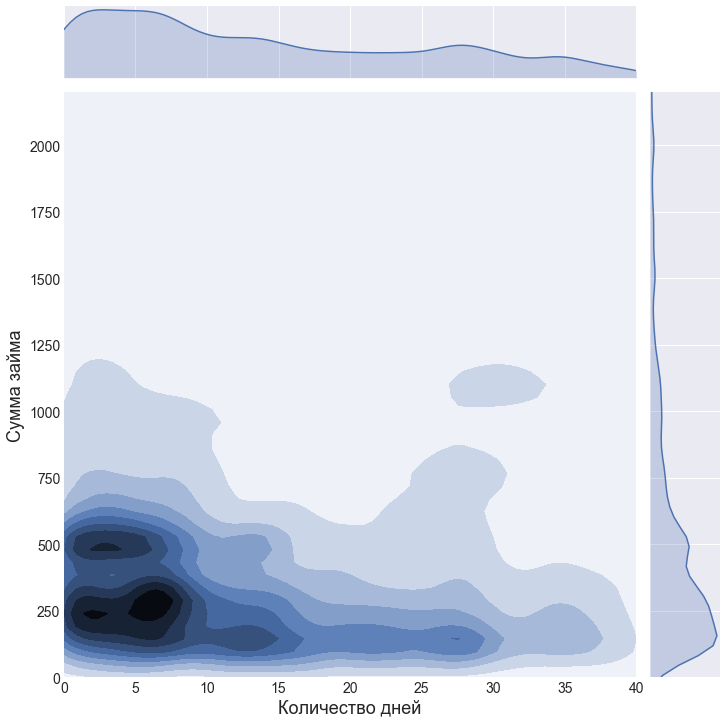

In [1238]:
p = sns.jointplot(x="time_funding", y="loan_amount", data=df_loans_dates_trimmed, kind='kde', height=10, ratio=7, xlim=[0,40] , ylim=[0,2200])\
        .set_axis_labels("Количество дней", "Сумма займа", size=18)
p.ax_joint.tick_params(labelsize=14)

plt.show()

The areas highlighted in one colour on the heat map contain the same number of applications. Herewith, the darker areas contain more applications than the light areas.
Indeed, the increasing number of days required for application funding may be explained by an increasing amount, but only in part.

We also observe many applications for less than **$250** with the terms amounting to **20-35** days. Kiva definitely can do something for people to pay more attention to such applications.<br><br>

### 3. Waiting time and countries
***
Let’s check if there is a shift of waiting intervals by countries. In other words, we will check the assumption that funding of the applications from certain countries takes unreasonably long time.

In [1239]:
df_country_median = df_loans_dates_trimmed.groupby(['world_region', 'country'])\
    .agg({'loan_amount' : 'median', 'time_funding' : 'median', 'term_in_months' : 'median'})\
    .reset_index()

df_country_median = df_country_median[df_country_median.country.isin(list_countries)].sort_values(by='time_funding')

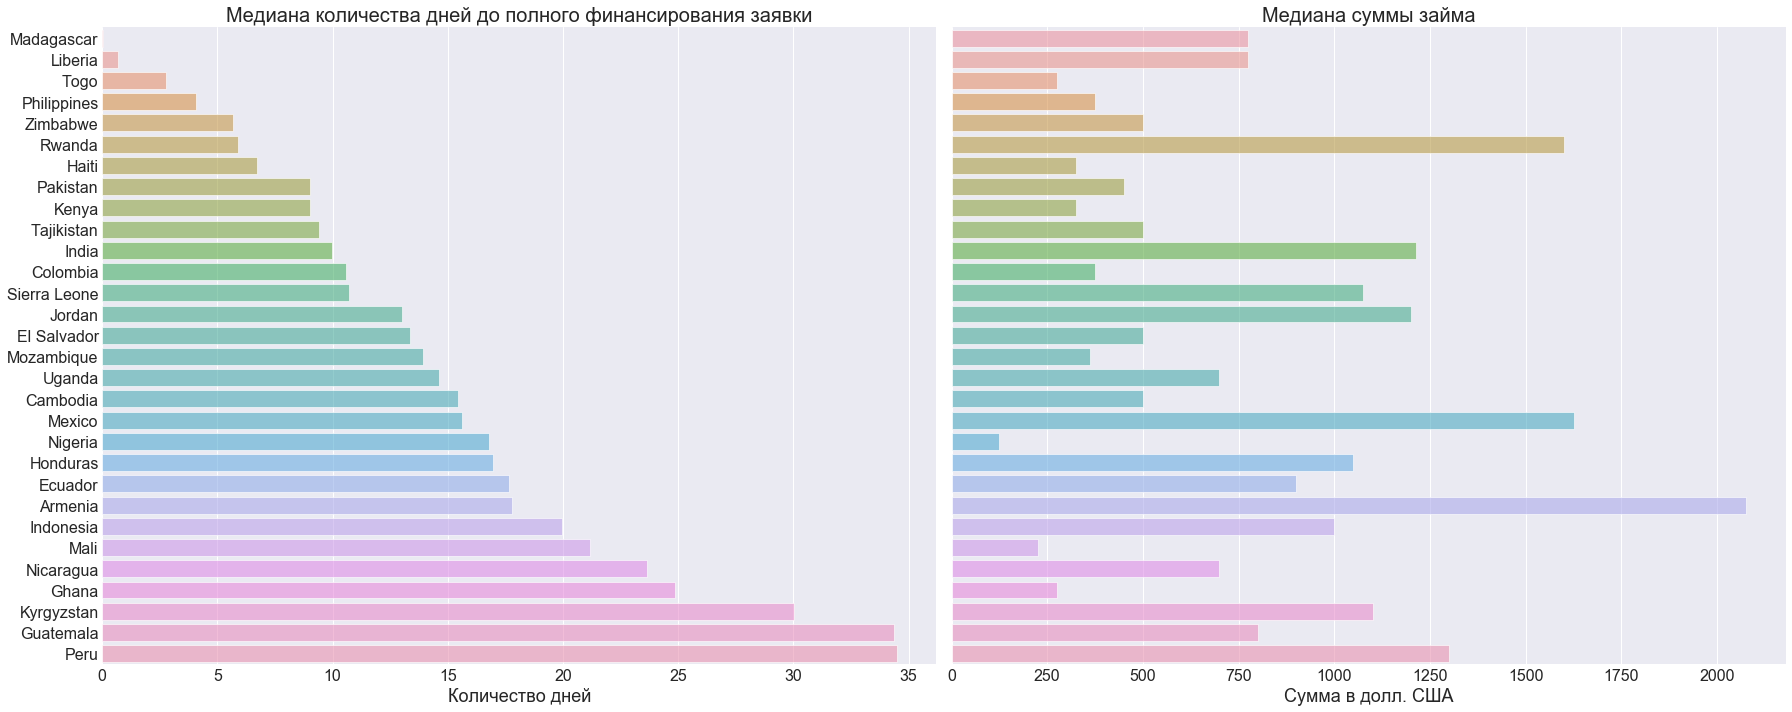

In [1240]:
f,ax=plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='time_funding', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана количества дней до полного финансирования заявки", fontsize=20)
ax[0].set_xlabel('Количество дней', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Indeed, we do not observe any direct relationship between the funding waiting time and the loan amount.
In a number of countries with a fairly large median loan amount, we observe short fundraising intervals:

- Liberia: **750** USD — **1** day;
- Rwanda: **1600** USD — **5** days;
- India: **1250** USD — **10** days.

Conversely, in several countries collecting relatively small amounts takes a long time:

- Nigeria: **125** USD — **17** days;
- Mali: **250** USD — **22** days;
- Ghana: **250** USD — **25** days.
<br><br>

## Loan amount and repayment time
***
It is essential to study the information on the number of months required for borrowers to repay their loans. Since a simple calculating of the average/median repayment time by country can both provide some information, and at the same time be misleading, the ratio of the loan amount to the repayment time gains greater importance.<br>It gives an idea of the monthly repayment amount that a person in a given country can afford.

### 1. Calculation of the monthly pay amount by country
***

In [1241]:
df_country_median = df_country_median.sort_values(by='term_in_months')

In [1242]:
df_country_median['monthly_repayment'] = df_country_median['loan_amount'] / df_country_median['term_in_months']

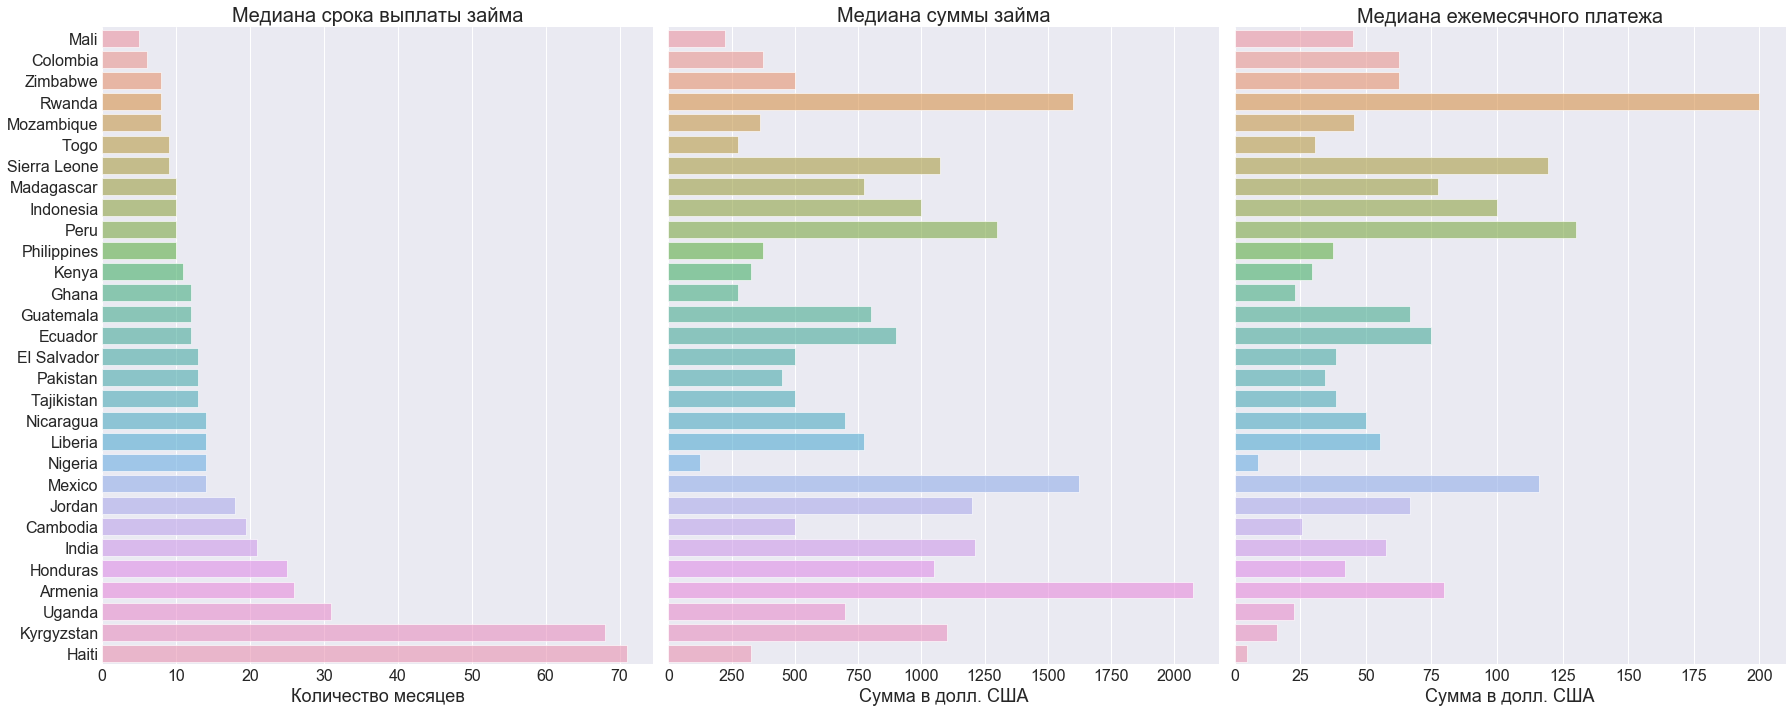

In [1243]:
f,ax=plt.subplots(1, 3, sharey=True, figsize=(25,10))

sns.barplot(y='country', x='term_in_months', data=df_country_median, alpha=0.6, ax=ax[0])
ax[0].set_title("Медиана срока выплаты займа", fontsize=20)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel(None)
ax[0].tick_params(labelsize=16)

sns.barplot(y='country', x='loan_amount', data=df_country_median, alpha=0.6, ax=ax[1])
ax[1].set_title("Медиана суммы займа", fontsize=20)
ax[1].set_xlabel('Сумма в долл. США', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

sns.barplot(y='country', x='monthly_repayment', data=df_country_median, alpha=0.6, ax=ax[2])
ax[2].set_title("Медиана ежемесячного платежа", fontsize=20)
ax[2].set_xlabel('Сумма в долл. США', fontsize=18)
ax[2].set_ylabel(None)
ax[2].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

Here is a visual representation of the ranking of the poorest countries, where people use the Kiva platform. These are countries where people can afford to pay much less than in other countries, which means that the level of poverty is higher there.

- Haiti;
- Nigeria;
- Kyrgyzstan;
- Uganda;
- Ghana.
<br>

### 2. Influence of the number of lenders on the amount and terms of loans
***

In [1267]:
df_lenders_median = df_kiva_loans_trimmed.groupby(["lender_count"])\
    .agg({'loan_amount' : 'median', 'term_in_months' : 'median'})\
    .reset_index()

In [1278]:
groupped_lenders = pd.cut(df_lenders_median["lender_count"], bins=6, right=False, precision=0).to_frame()
groupped_lenders
free_lenders = df_lenders_median.drop(["lender_count"], axis=1)
free_lenders
joined_lenders = groupped_lenders.join(free_lenders)
joined_lenders

,lender_count,loan_amount,term_in_months
0,"[0.0, 45.0)",525.0,14.0
1,"[0.0, 45.0)",250.0,8.0
2,"[0.0, 45.0)",225.0,8.0
3,"[0.0, 45.0)",150.0,8.0
4,"[0.0, 45.0)",150.0,8.0
...,...,...,...
176,"[179.0, 223.0)",4000.0,24.0
177,"[179.0, 223.0)",3500.0,24.0
178,"[223.0, 268.0)",4000.0,12.0
179,"[223.0, 268.0)",4000.0,24.0


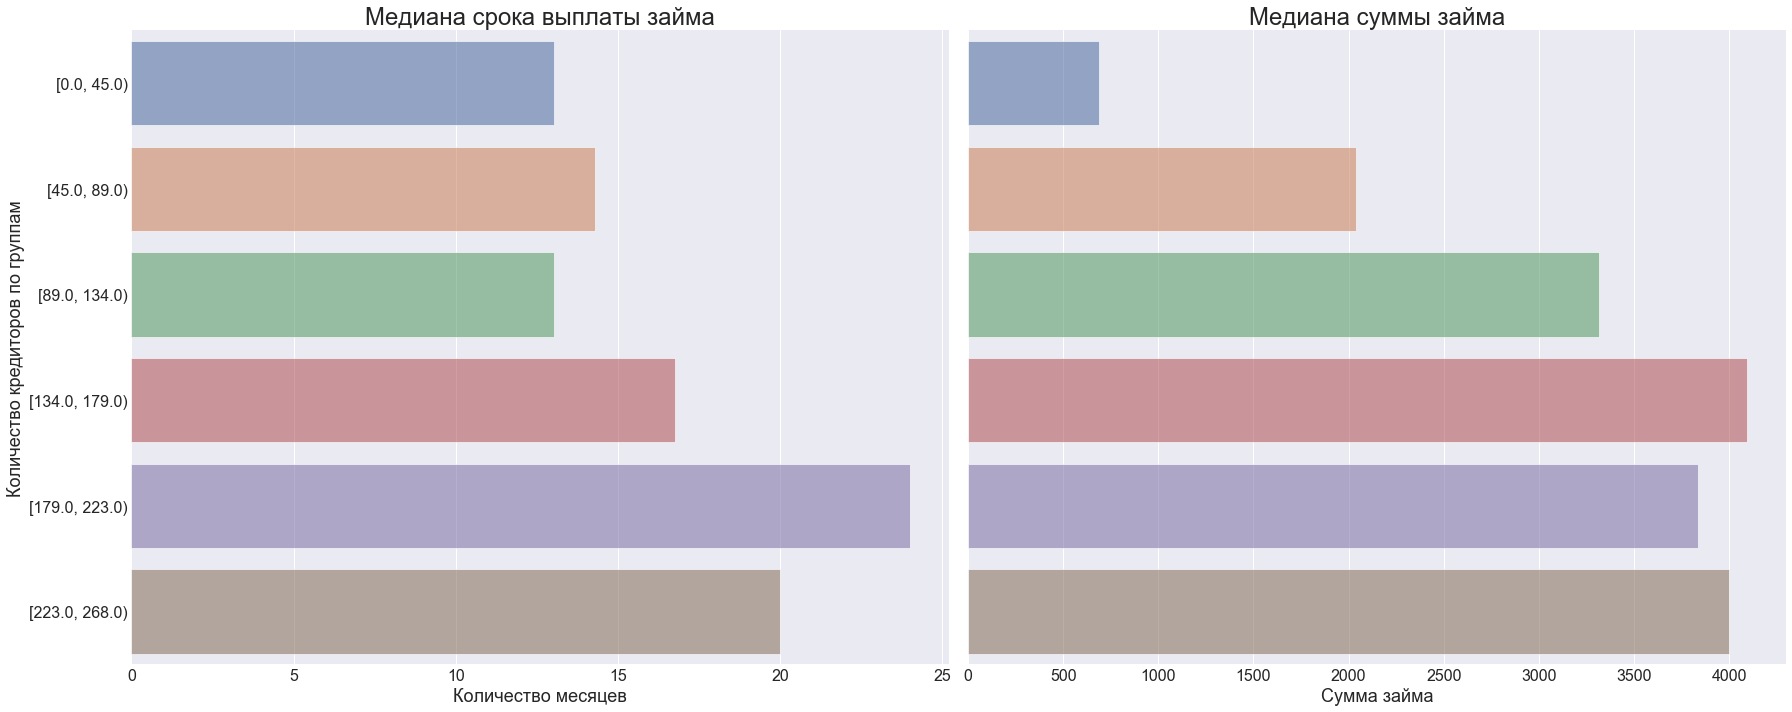

In [1280]:
f,ax=plt.subplots(1, 2, sharey=True, figsize=(25,10))

sns.barplot(y='lender_count', x='term_in_months', data=joined_lenders, alpha=0.6, ax=ax[0], ci = None)
ax[0].set_title("Медиана срока выплаты займа", fontsize=24)
ax[0].set_xlabel('Количество месяцев', fontsize=18)
ax[0].set_ylabel('Количество кредиторов по группам', fontsize=18)
ax[0].tick_params(labelsize=16)

sns.barplot(y='lender_count', x='loan_amount', data=joined_lenders, alpha=0.6, ax=ax[1], ci = None)
ax[1].set_title("Медиана суммы займа", fontsize=24)
ax[1].set_xlabel('Сумма займа', fontsize=18)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

For ease of data analysis, the number of lenders was divided into groups.<br>
It is clear that the larger the amount of the loan is, the more lenders are required to finance it.<br>
The connection may be observed between the number of lenders and the loan maturity. Although it is not so pronounced and in this case it may be due to many factors:
- the poverty level of the borrower (which may require more time to repay even for a small loan amount)
- the purpose of loan (which may influence the payback time of the borrower’s new business and the time when the borrower will be able to repay the debt to all creditors)
- number of borrowers
<br>

### 3. Impact of MPI (Multidimensional Poverty Index) index in different countries on the loan amount and maturity date
***

In [1290]:
df_lenders_median2 = df_kiva_loans_trimmed.groupby(["country","MPI"])\
    .agg({'loan_amount' : 'median', 'term_in_months' : 'median'})\
    .sort_values("MPI")
df_lenders_median2.tail(5)

,,loan_amount,term_in_months
country,MPI,,
Liberia,0.433867,275.0,11.0
Mali,0.444833,1000.0,8.0
Sierra Leone,0.481071,700.0,10.0
Burkina Faso,0.547692,975.0,8.0
South Sudan,0.549778,300.0,7.0


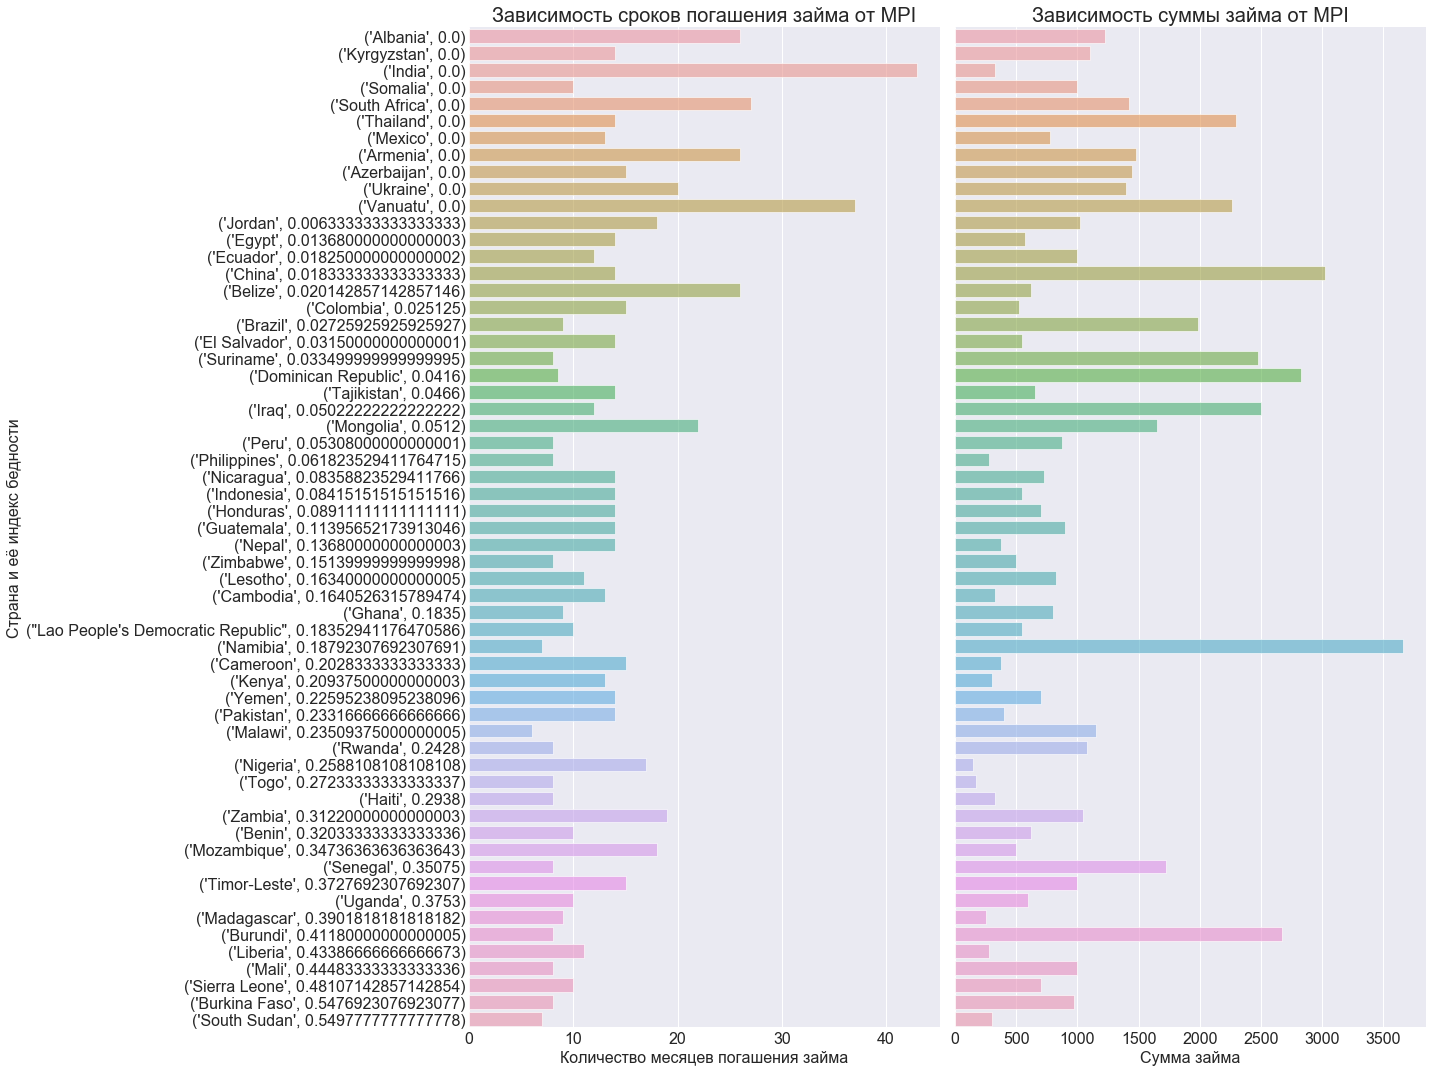

In [1291]:
f,ax=plt.subplots(1, 2, sharey=True, figsize=(20,15))

sns.barplot(y=df_lenders_median2.index, x=df_lenders_median2['term_in_months'], data=df_lenders_median2, alpha=0.6, ax=ax[0])
ax[0].set_title("Зависимость сроков погашения займа от MPI", fontsize=20)
ax[0].set_xlabel('Количество месяцев погашения займа', fontsize=16)
ax[0].set_ylabel('Страна и её индекс бедности', fontsize=16)
ax[0].tick_params(labelsize=16)

sns.barplot(y=df_lenders_median2.index, x=df_lenders_median2['loan_amount'], data=df_lenders_median2, alpha=0.6, ax=ax[1], ci = None)
ax[1].set_title("Зависимость суммы займа от MPI", fontsize=20)
ax[1].set_xlabel('Сумма займа', fontsize=16)
ax[1].set_ylabel(None)
ax[1].tick_params(labelsize=16)

plt.tight_layout()
plt.show()


We see that countries with a low poverty index require more time to repay the loan, which (judging by the chart) may be related to the amount of the loan and its purpose, and in some cases to the economy sector (in different regions the cost of business is different and the specifics of the sector are also of importance).<br>
Borrowers from poorer countries, on the other hand, generally request smaller amounts, but pay them back in a shorter time. Nevertheless, this figure is relative, as despite the fact that the terms are short, they are often comparable to the terms of the loan repayment by borrowers from richer countries who borrowed larger amounts.<br>
<br>

### 4. Interdependencies of such metrics as loan amount, loan Term, application funding time and monthly payment by macroregions.
***

In [1295]:
df_loans_dates_trimmed_copy = df_loans_dates_trimmed.copy()
df_loans_dates_trimmed_copy.loc[:, 'monthly_repayment'] = df_loans_dates_trimmed_copy['loan_amount'] / df_loans_dates_trimmed_copy['term_in_months']

macro = df_loans_dates_trimmed_copy[["world_region","loan_amount","time_funding","term_in_months","monthly_repayment"]]
macro = macro.set_index("world_region")
#macro

macro_med = macro.groupby(macro.index)\
    .agg({'loan_amount' : 'median', 'term_in_months' : 'median', 'time_funding' : 'median', 'monthly_repayment' : 'median'})
macro_med

,loan_amount,term_in_months,time_funding,monthly_repayment
world_region,,,,
Arab States,650.0,14.0,3.776863,46.428571
East Asia and the Pacific,575.0,10.0,9.963727,52.272727
Europe and Central Asia,1100.0,66.0,27.837870,16.417910
Latin America and Caribbean,750.0,13.0,18.583750,56.250000
South Asia,1112.5,21.0,9.744039,35.465116
Sub-Saharan Africa,300.0,13.0,11.614763,38.461538


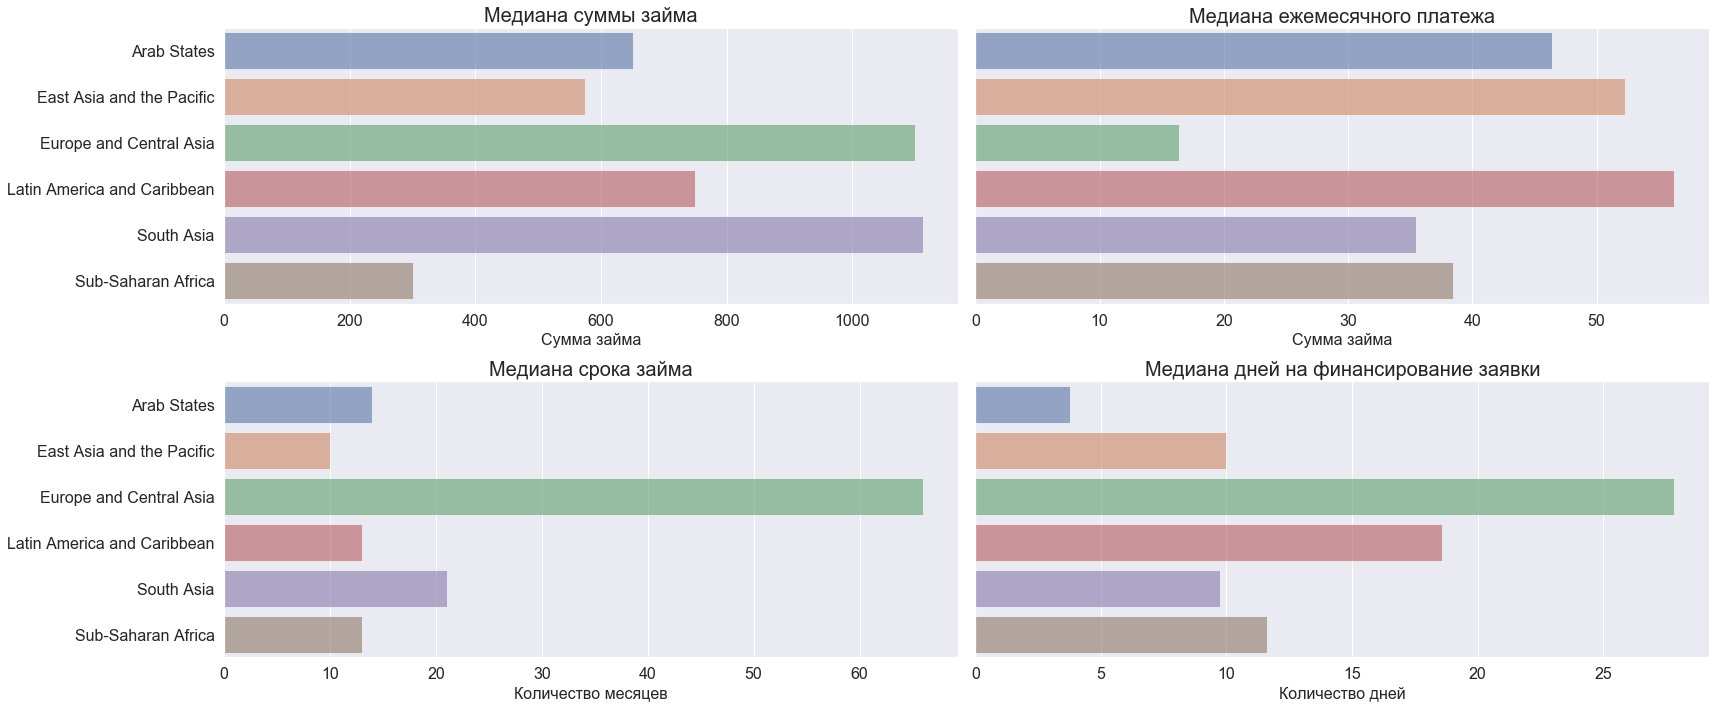

In [1189]:
f,ax=plt.subplots(2, 2, sharey=True, figsize=(24,10))

sns.barplot(y=macro_med.index, x='loan_amount', data=macro_med, alpha=0.6, ax=ax.flatten()[0], ci = None)
ax.flatten()[0].set_title("Медиана суммы займа", fontsize=20)
ax.flatten()[0].set_xlabel("Сумма займа", fontsize=16)
ax.flatten()[0].set_ylabel(None)
ax.flatten()[0].tick_params(labelsize=16)

sns.barplot(y=macro_med.index, x='monthly_repayment', data=macro_med, alpha=0.6, ax=ax.flatten()[1], ci = None)
ax.flatten()[1].set_title("Медиана ежемесячного платежа", fontsize=20)
ax.flatten()[1].set_xlabel("Сумма займа", fontsize=16)
ax.flatten()[1].set_ylabel(None)
ax.flatten()[1].tick_params(labelsize=16)

sns.barplot(y=macro_med.index, x='term_in_months', data=macro_med, alpha=0.6, ax=ax.flatten()[2], ci = None)
ax.flatten()[2].set_title("Медиана срока займа", fontsize=20)
ax.flatten()[2].set_xlabel("Количество месяцев", fontsize=16)
ax.flatten()[2].set_ylabel(None)
ax.flatten()[2].tick_params(labelsize=16)

sns.barplot(y=macro_med.index, x='time_funding', data=macro_med, alpha=0.6, ax=ax.flatten()[3], ci = None)
ax.flatten()[3].set_title("Медиана дней на финансирование заявки", fontsize=20)
ax.flatten()[3].set_xlabel('Количество дней', fontsize=16)
ax.flatten()[3].set_ylabel(None)
ax.flatten()[3].tick_params(labelsize=16)

plt.tight_layout()
plt.show()

The charts clearly show the connection of such metrics as **loan amount**, **loan Term**, **application funding time** and **monthly payment** by macroregions.<br>
The **European and Central Asian countries** (e.g., Kyrgyzstan, Uzbekistan, Turkmenistan and Tajikistan) with a high median loan amount affecting the speed of application funding and a low median monthly payment (which affects the loan term) stand out here quite clearly. This may indicate a low level of economic development of countries along with the development opportunities, especially using monetary resources that Kiva helps to raise.<br>
At the same time, in **South Asian countries** with similarly high median loan rates, applicants receive funding 2.5 times faster. This is another indicator of certain inequality between countries.<br>
<br>

# Results and conclusions
***

It is time to sum the main results up and draw conclusions that can be useful and interesting not only to the organizers of the Kiva platform, but also to the entire community of caring people who strive to make this world a better place. 

- First, it is essential to note a very important and significant role of the Kiva platform and its community. Kiva plays a crucial role for a large number of people in different parts of the world, as it supports **operations and business activities**, actively complements and often even acts as a private banking sector.
- At any time, we should provide **targeted assistance** to countries and regions **underfunded** as compared to others. These are countries with a high level of poverty, where people can pay much less than in other countries. It is time to draw the attention of the Kiva community and focus on **supporting those in greatest need** more than ever! Such applications can be grouped in certain categories; their headings can contain appeals: Urgent Needs, Urgent, Funding Term Running Out.
- The positive experience of the Philippines proves that small short-term loans should be issued more often, as they will ensure **greater employment** of the population and growth of **business activity**. If possible, the applications from poor countries should be divided into small short-term loans, each of which will be another small step in a big business. 
- When it comes to the opportunities for personal development – the distinction between men and women shall be dropped. We should strive to ensure **equal** access to funding for both **men and women**, and pay attention to the countries and regions where such a balance is upset. For example, for countries such as Samoa, Liberia, Togo, loans from men may be displayed on the homepage first. Publishing personal stories and examples of women and men, for example, by **online publishing houses** or **blogging platforms** like medium.com, and on the Kiva video blog on youtube.com, will be a great solution.
- The priority should be given to the applications aimed at developing industries with **high added value and production stimulating** namely, **construction, manufacturing**, and **light industry**. They are the driving force that involves other industries. This is where the smart recommendation systems on Kiva.org, which are more likely to prompt such requests come in handy. 
- The share of applications aimed at meeting the most **basic human needs** is still quite high. Such applications should not go unnoticed, but be the top applications on the homepage. It is unacceptable that, for example, people in Nigeria are waiting for vital clean water for 10 days. A digest of such applications can be included in **regular mailshots** to all members of the Kiva community who ever participated in project funding.
- Funding of applications for **large amounts** and **long-term projects** is also effective. For some countries, the possibility to use Kiva will play a decisive role in the formation and implementation of infrastructure and strategic projects.
- Some regions and countries, such as **South Asia**, namely, **Pakistan** and **India**, provide great opportunities for expanding the presence and activities of the Kiva community.
- There are frequent cases of **inequalities between countries**, such as, for example, long waiting times for funding of a part of applications for very small amounts. We believe that it is in the power of the organizers and community of Kiva platform to **mitigate these obvious inequalities** by adjusting search results, newsletter content, and community featured applications.
<br><br>